In [1]:
import pandas as pd
import numpy as np
import random
import pacmap
from sklearn.decomposition import PCA

from tasks.input import processInputFiles



Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion'


/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for deta

In [3]:
config = {
    "vcfLike": {
        "path": "../adhoc analysis/nupsGenotypes.csv",  # variant call table with annotations
        "sheet": "all cases vs all controls",  # sheet name if Excel spreadsheet
        "indexColumn": [
            "chrom",
            "position",
            "Gene",
        ],  # header that indexes variants (set as list with multiple columns)
        "geneMultiIndexLevel": 2,  # level of gene index in indexColumn
        "aggregateGenesBy": "mean",  # aggregate variants within genes by mean, sum, or meanFrequency. Set to None to disable.
        "compoundSampleIdDelimiter": "__",  # delimiter for compound sample IDs in column names
        "compoundSampleIdStartIndex": 1,  # index of genotype ID in compound sample ID
        "compoundSampleMetaIdStartIndex": 1,  # index of clinical ID in compound sample ID
        "binarize": False,  # binarize variants to 0/1, or sum to weigh allele frequency
        "minAlleleFrequency": 0.00,  # filter out variants with allele frequency less than this
        "maxVariants": None, # set max number of variants for control; set to None to disable
        # 'alleleModel': ['dominant', 'recessive', 'overDominant'],  # biallelic allele models to test on gene sets
        "filters": {},
    },  # TODO handle genotypes from related individuals
    "geneSets": {},  # TODO gene sets
    "tracking": {
        "name": "NUPs genes, Caucasian individuals",  # name of the experiment
        "entity": "ejmockler",
        "project": "ALS-logisticRegression-NUPs-gene-1MAF",
        "plotAllSampleImportances": True,  # if calculating Shapely explanations, plot each sample in Neptune
        "remote": False,  # if True, log to Neptune
    },
    "clinicalTable": {
        "path": "../adhoc analysis/ACWM.xlsx",  # clinical data as Excel spreadsheet
        "idColumn": "ExternalSampleId",  # genotype ID header
        "subjectIdColumn": "ExternalSubjectId",  # unique ID for each patient
        "labelColumn": "Subject Group",  # header that has case/control labels
        "controlLabels": [
            "Non-Neurological Control"
        ],  # these labels include external sample IDs (like 1000 Genomes)
        "caseLabels": ["ALS Spectrum MND"],  # "ALS Spectrum MND"
        "controlAlias": "control",
        "caseAlias": "case",
        "filters": "pct_european>=0.85",  # filter out nonhomogenous samples with less than 85% European ancestry
    },
    "externalTables": {
        "path": [
            "../adhoc analysis/igsr-1000 genomes phase 3 release.tsv",
            # "../adhoc analysis/ALS-NUPS-2000__accurateSamples_>=97.5%.csv",
            "../adhoc analysis/ACWM_ethnicallyVariable.tsv",
            "../adhoc analysis/ACWM_ethnicallyVariable.tsv",
            "../adhoc analysis/igsr-1000 genomes phase 3 release.tsv",
        ],  # external sample table
        "label": [
            "control",
            # "case",
            "case",
            "control",
            "control",
        ],  # case | control
        "setType": [
            "crossval",
            # "crossval",
            "holdout",
            "holdout",
            "holdout",
        ],
        "idColumn": [
            "Sample name",
            # "id",
            "ExternalSampleId",
            "ExternalSampleId",
            "Sample name",
        ],  # sample ID header
        "filters": [
            "`Superpopulation code`=='EUR'",
            # "`testLabel`==1",
            "`Subject Group`=='ALS Spectrum MND' & `pct_european`<0.85",
            "`Subject Group`=='Non-Neurological Control' & `pct_european`<0.85",
            "`Superpopulation code`!='EUR'",
        ],
    },
    "sampling": {
        "bootstrapIterations": 15,
        "crossValIterations": 10,  # number of validations per bootstrap iteration
        "holdoutSplit": 0.1,
        "lastIteration": 0,
        "sequesteredIDs": [],
    },
    "model": {
        "hyperparameterOptimization": True,
        "calculateShapelyExplanations": False,
    },
}

## Load filtered IDs 


In [4]:
genotypeData, filteredClinicalData = processInputFiles(config)

15:10:40.316 | INFO    | prefect.engine - Created flow run 'little-slug' for flow 'processInputFiles'

15:10:40.393 | INFO    | Flow run 'little-slug' - Created task run 'load-0' for task 'load'

15:10:40.394 | INFO    | Flow run 'little-slug' - Executing 'load-0' immediately...

15:10:45.761 | INFO    | Task run 'load-0' - Finished in state Completed()

15:10:45.777 | INFO    | Flow run 'little-slug' - Created task run 'filterTable-0' for task 'filterTable'

15:10:45.778 | INFO    | Flow run 'little-slug' - Executing 'filterTable-0' immediately...

15:10:45.811 | INFO    | Task run 'filterTable-0' - Filtering: pct_european>=0.85

15:10:45.835 | INFO    | Task run 'filterTable-0' - Finished in state Completed()

15:10:45.836 | INFO    | Flow run 'little-slug' - filtered 590 samples from clinical data

15:10:45.856 | INFO    | Flow run 'little-slug' - Created task run 'filterTable-1' for task 'filterTable'

15:10:45.857 | INFO    | Flow run 'little-slug' - Executing 'filterTable-1' immediately...

15:10:45.894 | INFO    | Task run 'filterTable-1' - Filtering: `Superpopulation code`=='EUR'

15:10:45.913 | INFO    | Task run 'filterTable-1' - Finished in state Completed()

15:10:45.928 | INFO    | Flow run 'little-slug' - Created task run 'filterTable-2' for task 'filterTable'

15:10:45.929 | INFO    | Flow run 'little-slug' - Executing 'filterTable-2' immediately...

15:10:45.967 | INFO    | Task run 'filterTable-2' - Filtering: `Subject Group`=='ALS Spectrum MND' & `pct_european`<0.85

15:10:45.990 | INFO    | Task run 'filterTable-2' - Finished in state Completed()

15:10:46.007 | INFO    | Flow run 'little-slug' - Created task run 'filterTable-3' for task 'filterTable'

15:10:46.008 | INFO    | Flow run 'little-slug' - Executing 'filterTable-3' immediately...

15:10:46.041 | INFO    | Task run 'filterTable-3' - Filtering: `Subject Group`=='Non-Neurological Control' & `pct_european`<0.85

15:10:46.064 | INFO    | Task run 'filterTable-3' - Finished in state Completed()

15:10:46.092 | INFO    | Flow run 'little-slug' - Created task run 'filterTable-4' for task 'filterTable'

15:10:46.093 | INFO    | Flow run 'little-slug' - Executing 'filterTable-4' immediately...

15:10:46.127 | INFO    | Task run 'filterTable-4' - Filtering: `Superpopulation code`!='EUR'

15:10:46.148 | INFO    | Task run 'filterTable-4' - Finished in state Completed()

15:10:46.149 | INFO    | Flow run 'little-slug' - filtered 4309 samples from external data ../adhoc analysis/igsr-1000 genomes phase 3 release.tsv

15:10:46.150 | INFO    | Flow run 'little-slug' - filtered 4158 samples from external data ../adhoc analysis/ACWM_ethnicallyVariable.tsv

15:10:46.151 | INFO    | Flow run 'little-slug' - filtered 4426 samples from external data ../adhoc analysis/ACWM_ethnicallyVariable.tsv

15:10:46.151 | INFO    | Flow run 'little-slug' - filtered 669 samples from external data ../adhoc analysis/igsr-1000 genomes phase 3 release.tsv

15:10:46.168 | INFO    | Flow run 'little-slug' - Created task run 'filterTable-5' for task 'filterTable'

15:10:46.168 | INFO    | Flow run 'little-slug' - Executing 'filterTable-5' immediately...

15:10:46.220 | INFO    | Task run 'filterTable-5' - Finished in state Completed()

15:10:46.221 | INFO    | Flow run 'little-slug' - filtered 0 variants from VCF

15:10:46.322 | INFO    | Flow run 'little-slug' - Created task run 'applyAlleleModel-0' for task 'applyAlleleModel'

15:10:46.323 | INFO    | Flow run 'little-slug' - Submitted task run 'applyAlleleModel-0' for execution.

15:10:46.335 | INFO    | Flow run 'little-slug' - Created task run 'applyAlleleModel-1' for task 'applyAlleleModel'

15:10:46.335 | INFO    | Flow run 'little-slug' - Submitted task run 'applyAlleleModel-1' for execution.

 55%|█████▌    | 1605/2904 [01:30<01:24, 15.46id/s]

15:12:16.878 | INFO    | Task run 'applyAlleleModel-1' - Finished in state Completed()

100%|██████████| 2904/2904 [01:56<00:00, 24.85id/s]  


15:12:43.300 | INFO    | Task run 'applyAlleleModel-0' - Finished in state Completed()

15:12:43.440 | INFO    | Flow run 'little-slug' - Created task run 'applyAlleleModel-2' for task 'applyAlleleModel'

15:12:43.441 | INFO    | Flow run 'little-slug' - Submitted task run 'applyAlleleModel-2' for execution.

15:12:43.451 | INFO    | Flow run 'little-slug' - Created task run 'applyAlleleModel-3' for task 'applyAlleleModel'

15:12:43.451 | INFO    | Flow run 'little-slug' - Submitted task run 'applyAlleleModel-3' for execution.

100%|██████████| 326/326 [00:15<00:00, 21.09id/s]


15:12:59.487 | INFO    | Task run 'applyAlleleModel-2' - Finished in state Completed()

100%|██████████| 4367/4367 [02:00<00:00, 36.38id/s] 


15:14:43.694 | INFO    | Task run 'applyAlleleModel-3' - Finished in state Completed()

15:14:43.697 | INFO    | Flow run 'little-slug' - 
missing 1642 case IDs:
 {'CGND-HDA-03334', 'CGND-HDA-00098', 'CGND-HDA-00666', 'CGND-HDA-05301', 'CGND-HDA-00714', 'CGND-HDA-00729', 'CGND-HDA-00904', 'CGND-HDA-04768', 'CGND-HDA-04166', 'CGND-HDA-05496', 'CGND-HDA-05302', 'CGND-HDA-04663', 'CGND-HDA-01338', 'CGND-HDA-00741', 'CGND-HDA-04897', 'CGND-HDA-04468', 'CGND-HDA-01041', 'CGND-HDA-00881', 'CGND-HDA-04357', 'CGND-HDA-05511', 'CGND-HDA-00706', 'CGND-HDA-00304', 'CGND-HDA-04644', 'CGND-HDA-04804', 'CGND-HDA-01001', 'CGND-HDA-00880', 'CGND-HDA-03344', 'CGND-HDA-04146', 'CGND-HDA-04178', 'CGND-HDA-04544', 'CGND-HDA-00936', 'CGND-HDA-00730', 'CGND-HDA-04128', 'CGND-HDA-02890', 'CGND-HDA-00661', 'CGND-HDA-00224', 'CGND-HDA-00037', 'CGND-HDA-04345', 'CGND-HDA-01170', 'CGND-HDA-00911', 'CGND-HDA-00355', 'CGND-HDA-00709', 'CGND-HDA-04270', 'CGND-HDA-01005', 'CGND-HDA-00071', 'CGND-HDA-00445', 'CGND-HDA-01328', 'CGND-HDA-01284', 'CGND-HDA-03306', 'CGND-HDA-04578', 'CGND-HDA-04577', 'CGND-HDA-04208', 'CGND-HDA-00612', 'CGND-HDA-05306', 'CGND-HDA-04872', 'CGND-HDA-04299', 'CGND-HDA-04133', 'CGND-HDA-01122', 'CGND-HDA-04569', 'CGND-HDA-01100', 'CGND-HDA-00513', 'CGND-HDA-02483-1', 'CGND-HDA-04800', 'CGND-HDA-04483', 'CGND-HDA-03381', 'CGND-HDA-00271', 'CGND-HDA-04427', 'CGND-HDA-04658', 'CGND-HDA-00868', 'CGND-HDA-04597', 'CGND-HDA-00994', 'CGND-HDA-00769', 'CGND-HDA-00787', 'CGND-HDA-04429', 'CGND-HDA-04572', 'CGND-HDA-00670', 'CGND-HDA-00740', 'CGND-HDA-00114', 'CGND-HDA-04565', 'CGND-HDA-05503', 'CGND-HDA-04506', 'CGND-HDA-00931', 'CGND-HDA-00284', 'CGND-HDA-00298', 'CGND-HDA-01098', 'CGND-HDA-00754', 'CGND-HDA-03117', 'CGND-HDA-04485', 'CGND-HDA-04625', 'CGND-HDA-04282', 'CGND-HDA-05513', 'CGND-HDA-04407', 'CGND-HDA-00533', 'CGND-HDA-00756', 'CGND-HDA-00320', 'CGND-HDA-04737', 'CGND-HDA-00453', 'CGND-HDA-03305', 'CGND-HDA-04841', 'CGND-HDA-01186', 'CGND-HDA-05502', 'CGND-HDA-04137', 'CGND-HDA-04176', 'CGND-HDA-00803', 'CGND-HDA-00460', 'CGND-HDA-04231', 'CGND-HDA-00200', 'CGND-HDA-04585', 'CGND-HDA-04416', 'CGND-HDA-04422', 'CGND-HDA-04256', 'CGND-HDA-00262', 'CGND-HDA-04702', 'CGND-HDA-01046', 'CGND-HDA-00833', 'CGND-HDA-00482', 'CGND-HDA-01109', 'CGND-HDA-01263', 'CGND-HDA-04813', 'CGND-HDA-04864', 'CGND-HDA-04683', 'CGND-HDA-00306', 'CGND-HDA-00156', 'CGND-HDA-00767', 'CGND-HDA-04950', 'CGND-HDA-03296', 'CGND-HDA-04135', 'CGND-HDA-04336', 'CGND-HDA-01056', 'CGND-HDA-01166', 'CGND-HDA-03317', 'CGND-HDA-00059', 'CGND-HDA-00790', 'CGND-HDA-01243', 'CGND-HDA-00199', 'CGND-HDA-05514', 'CGND-HDA-00816', 'CGND-HDA-04215', 'CGND-HDA-04212', 'CGND-HDA-00989', 'CGND-HDA-01196', 'CGND-HDA-01135', 'CGND-HDA-04586', 'CGND-HDA-01102', 'CGND-HDA-04609', 'CGND-HDA-00198', 'CGND-HDA-04673', 'CGND-HDA-04645', 'CGND-HDA-00806', 'CGND-HDA-00921', 'CGND-HDA-03335', 'CGND-HDA-01019', 'CGND-HDA-01052', 'CGND-HDA-01282', 'CGND-HDA-00830', 'CGND-HDA-04364', 'CGND-HDA-02892', 'CGND-HDA-04142', 'CGND-HDA-04415', 'CGND-HDA-00906', 'CGND-HDA-04916', 'CGND-HDA-01199', 'CGND-HDA-00539', 'CGND-HDA-00814', 'CGND-HDA-00280', 'CGND-HDA-01006', 'CGND-HDA-04095', 'CGND-HDA-00743', 'CGND-HDA-01224', 'CGND-HDA-00274', 'CGND-HDA-03357', 'CGND-HDA-01053', 'CGND-HDA-00569', 'CGND-HDA-04491', 'CGND-HDA-04672', 'CGND-HDA-02897', 'CGND-HDA-00336', 'CGND-HDA-01155', 'CGND-HDA-04251', 'CGND-HDA-00319', 'CGND-HDA-00499', 'CGND-HDA-00799', 'CGND-HDA-01219', 'CGND-HDA-00920', 'CGND-HDA-01271', 'CGND-HDA-05304', 'CGND-HDA-04924', 'CGND-HDA-00494', 'CGND-HDA-00300', 'CGND-HDA-05499', 'CGND-HDA-04574', 'CGND-HDA-00348', 'CGND-HDA-04145', 'CGND-HDA-04652', 'CGND-HDA-02881', 'CGND-HDA-00275', 'CGND-HDA-04785', 'CGND-HDA-00356', 'CGND-HDA-00018', 'CGND-HDA-04662', 'CGND-HDA-00784', 'CGND-HDA-01032', 'CGND-HDA-04782', 'CGND-HDA-04305', 'CGND-HDA-01072', 'CGND-HDA-00508', 'CGND-HDA-04860', 'CGND-HDA-00493', 'CGND-HDA-00753', 'CGND-HDA-01187', 'CGND-HDA-00102', 'CGND-HDA-01319', 'CGND-HDA-01212', 'CGND-HDA-05500', 'CGND-HDA-00609', 'CGND-HDA-00341', 'CGND-HDA-01361', 'CGND-HDA-04371'

15:14:43.701 | INFO    | Flow run 'little-slug' - 
missing 256 control IDs:
 {'CGND-HDA-00214', 'CGND-HDA-03177', 'CGND-HDA-03170', 'HG01681', 'CGND-HDA-00196', 'HG01526', 'CGND-HDA-04735', 'CGND-HDA-00178', 'CGND-HDA-04849', 'NA10864', 'CGND-HDA-04889', 'HG01621', 'CGND-HDA-04894', 'CGND-HDA-04923', 'HG01622', 'HG01609', 'NA12740', 'NA10863', 'NA20537', 'NA20526', 'HG00104', 'CGND-HDA-05300', 'CGND-HDA-03168', 'NA10852', 'HG01508', 'HG01633', 'NA06993', 'HG00247', 'CGND-HDA-02867', 'NA11917', 'NA12264', 'CGND-HDA-00997', 'NA12386', 'NA12802', 'NA10855', 'HG01687', 'NA12274', 'CGND-HDA-03171', 'NA12344', 'NA07346', 'CGND-HDA-00167', 'CGND-HDA-04846', 'HG00359', 'NA12485', 'CGND-HDA-04736', 'NA10840', 'HG01517', 'CGND-HDA-05299', 'HG01629', 'NA12875', 'HG04302', 'CGND-HDA-04734', 'NA10842', 'CGND-HDA-04824', 'CGND-HDA-02876', 'HG01755', 'NA10845', 'NA12546', 'HG00144', 'HG01532', 'HG04301', 'CGND-HDA-02752', 'CGND-HDA-00435', 'NA12708', 'NA12818', 'NA11993', 'HG01683', 'HG00152', 'NA12739', 'HG04303', 'CGND-HDA-04825', 'NA10857', 'CGND-HDA-03185', 'HG01787', 'HG01780', 'NA12056', 'NA12832', 'HG02218', 'HG01502', 'NA12376', 'NA12375', 'NA10835', 'CGND-HDA-00216', 'HG01538', 'HG01748', 'NA20829', 'CGND-HDA-02869', 'NA10861', 'NA12767', 'CGND-HDA-03184', 'NA12145', 'NA12707', 'HG01601', 'CGND-HDA-02891', 'CGND-HDA-00179', 'HG01614', 'HG00270', 'NA12766', 'CGND-HDA-04834', 'NA07045', 'HG00135', 'CGND-HDA-02865', 'NA20816', 'CGND-HDA-01020', 'HG01772', 'NA07345', 'CGND-HDA-03318', 'NA07055', 'CGND-HDA-03173', 'NA12057', 'HG00153', 'NA12801', 'HG01763', 'CGND-HDA-04733', 'HG00147', 'CGND-HDA-03356', 'NA07029', 'CGND-HDA-00556', 'NA07435', 'CGND-HDA-03326', 'CGND-HDA-03325', 'HG01505', 'NA10839', 'NA07022', 'CGND-HDA-02884', 'HG01701', 'CGND-HDA-04749', 'HG00124', 'CGND-HDA-05298', 'CGND-HDA-00166', 'CGND-HDA-03182', 'NA12343', 'HG01711', 'HG01778', 'NA07348', 'CGND-HDA-04848', 'HG01523', 'CGND-HDA-05535', 'CGND-HDA-01021', 'HG02229', 'CGND-HDA-00434', 'CGND-HDA-03174', 'CGND-HDA-00217', 'NA07031', 'HG01774', 'NA07349', 'NA12864', 'NA12248', 'CGND-HDA-02863', 'HG00156', 'HG01627', 'NA12865', 'NA10854', 'CGND-HDA-00564', 'CGND-HDA-00180', 'NA11839', 'CGND-HDA-03183', 'NA10843', 'CGND-HDA-03369', 'CGND-HDA-00209', 'CGND-HDA-02868', 'NA10846', 'HG01782', 'NA12146', 'CGND-HDA-00165', 'HG01611', 'NA10830', 'HG02237', 'CGND-HDA-01123', 'CGND-HDA-04828', 'NA11882', 'NA10831', 'NA12753', 'NA12877', 'NA07014', 'HG01520', 'CGND-HDA-03164', 'NA10853', 'CGND-HDA-03169', 'CGND-HDA-03398', 'NA12892', 'NA12335', 'HG00248', 'HG02225', 'HG00303', 'CGND-HDA-02878', 'HG01529', 'NA06997', 'NA06991', 'NA07034', 'HG00249', 'CGND-HDA-03175', 'CGND-HDA-02880', 'CGND-HDA-01167', 'CGND-HDA-03172', 'NA12752', 'NA10865', 'HG01696', 'CGND-HDA-00260', 'HG01769', 'CGND-HDA-04922', 'NA20831', 'HG01604', 'NA11891', 'CGND-HDA-04835', 'NA12336', 'HG01616', 'CGND-HDA-03179', 'CGND-HDA-00599', 'NA12891', 'HG01703', 'NA12830', 'HG01698', 'CGND-HDA-03297', 'HG02217', 'HG00302', 'HG02222', 'CGND-HDA-02489-1', 'CGND-HDA-04822', 'HG01514', 'HG02234', 'NA10860', 'NA10838', 'HG02240', 'NA07340', 'CGND-HDA-02887', 'NA06995', 'HG00312', 'NA12817', 'NA10837', 'HG01667', 'NA10850', 'NA10856', 'CGND-HDA-02883', 'CGND-HDA-00565', 'CGND-HDA-02837', 'HG00098', 'CGND-HDA-02736', 'HG00377', 'HG00134', 'NA12239', 'HG01674', 'CGND-HDA-03163', 'NA10836', 'HG01671', 'NA07019', 'HG01764', 'NA12329', 'CGND-HDA-03294', 'HG01511', 'HG01677', 'CGND-HDA-04830', 'CGND-HDA-02870', 'NA10859', 'NA12236', 'HG01706'}

15:14:43.702 | INFO    | Flow run 'little-slug' - 
missing 196 holdout cases IDs:
 {'CGND-HDA-01278', 'CGND-HDA-04752', 'CGND-HDA-04815', 'CGND-HDA-01337', 'CGND-HDA-04858', 'CGND-HDA-03372', 'CGND-HDA-00860', 'CGND-HDA-00844', 'CGND-HDA-01283', 'CGND-HDA-00762', 'CGND-HDA-04764', 'CGND-HDA-00842', 'CGND-HDA-04171', 'CGND-HDA-01264', 'CGND-HDA-04940', 'CGND-HDA-00188', 'CGND-HDA-04720', 'CGND-HDA-04511', 'CGND-HDA-04795', 'CGND-HDA-03312', 'CGND-HDA-02874', 'CGND-HDA-00987', 'CGND-HDA-01195', 'CGND-HDA-01208', 'CGND-HDA-04863', 'CGND-HDA-00966', 'CGND-HDA-00838', 'CGND-HDA-00857', 'CGND-HDA-01061', 'CGND-HDA-00849', 'CGND-HDA-00982', 'CGND-HDA-00544', 'CGND-HDA-04129', 'CGND-HDA-00466', 'CGND-HDA-00858', 'CGND-HDA-00835', 'CGND-HDA-04868', 'CGND-HDA-03332', 'CGND-HDA-01115', 'CGND-HDA-00986', 'CGND-HDA-00847', 'CGND-HDA-04772', 'CGND-HDA-03289', 'CGND-HDA-04842', 'CGND-HDA-04788', 'CGND-HDA-04910', 'CGND-HDA-00977', 'CGND-HDA-04100', 'CGND-HDA-00325', 'CGND-HDA-04790', 'CGND-HDA-00855', 'CGND-HDA-04853', 'CGND-HDA-04668', 'CGND-HDA-01138', 'CGND-HDA-04332', 'CGND-HDA-00848', 'CGND-HDA-01039', 'CGND-HDA-04789', 'CGND-HDA-04801', 'CGND-HDA-01143', 'CGND-HDA-00573', 'CGND-HDA-00836', 'CGND-HDA-01235', 'CGND-HDA-04861', 'CGND-HDA-04810', 'CGND-HDA-04477', 'CGND-HDA-00850', 'CGND-HDA-00176', 'CGND-HDA-00981', 'CGND-HDA-04102', 'CGND-HDA-04911', 'CGND-HDA-01323', 'CGND-HDA-04797', 'CGND-HDA-01000', 'CGND-HDA-04794', 'CGND-HDA-04096', 'CGND-HDA-05509', 'CGND-HDA-00585', 'CGND-HDA-00837', 'CGND-HDA-01367', 'CGND-HDA-04779', 'CGND-HDA-04656', 'CGND-HDA-04803', 'CGND-HDA-04358', 'CGND-HDA-04333', 'CGND-HDA-01232', 'CGND-HDA-00211', 'CGND-HDA-01335', 'CGND-HDA-01340', 'CGND-HDA-00483', 'CGND-HDA-00968', 'CGND-HDA-01185', 'CGND-HDA-03288', 'CGND-HDA-00943', 'CGND-HDA-04760', 'CGND-HDA-04786', 'CGND-HDA-00852', 'CGND-HDA-01033', 'CGND-HDA-00861', 'CGND-HDA-04927', 'CGND-HDA-01204', 'CGND-HDA-04770', 'CGND-HDA-04909', 'CGND-HDA-04776', 'CGND-HDA-04766', 'CGND-HDA-00834', 'CGND-HDA-01336', 'CGND-HDA-04811', 'CGND-HDA-00797', 'CGND-HDA-00859', 'CGND-HDA-04806', 'CGND-HDA-04919', 'CGND-HDA-00980', 'CGND-HDA-00245', 'CGND-HDA-00376', 'CGND-HDA-00613', 'CGND-HDA-04814', 'CGND-HDA-04958', 'CGND-HDA-01334', 'CGND-HDA-04802', 'CGND-HDA-04306', 'CGND-HDA-01296', 'CGND-HDA-04466', 'CGND-HDA-01037', 'CGND-HDA-00029', 'CGND-HDA-01059', 'CGND-HDA-03321', 'CGND-HDA-04757', 'CGND-HDA-00841', 'CGND-HDA-00359', 'CGND-HDA-00851', 'CGND-HDA-00653', 'CGND-HDA-01339', 'CGND-HDA-04753', 'CGND-HDA-00591', 'CGND-HDA-00839', 'CGND-HDA-05532', 'CGND-HDA-04914', 'CGND-HDA-00854', 'CGND-HDA-04953', 'CGND-HDA-04751', 'CGND-HDA-00853', 'CGND-HDA-00568', 'CGND-HDA-04763', 'CGND-HDA-00175', 'CGND-HDA-01329', 'CGND-HDA-00604', 'CGND-HDA-03124', 'CGND-HDA-03120', 'CGND-HDA-00992', 'CGND-HDA-04535', 'CGND-HDA-05508', 'CGND-HDA-00846', 'CGND-HDA-03189', 'CGND-HDA-00843', 'CGND-HDA-01274', 'CGND-HDA-00352', 'CGND-HDA-01295', 'CGND-HDA-04952', 'CGND-HDA-04665', 'CGND-HDA-00575', 'CGND-HDA-04859', 'CGND-HDA-01221', 'CGND-HDA-00490', 'CGND-HDA-04798', 'CGND-HDA-04904', 'CGND-HDA-04816', 'CGND-HDA-04818', 'CGND-HDA-01268', 'CGND-HDA-01131', 'CGND-HDA-00800', 'CGND-HDA-04754', 'CGND-HDA-00940', 'CGND-HDA-01229', 'CGND-HDA-00765', 'CGND-HDA-03104', 'CGND-HDA-04901', 'CGND-HDA-04313', 'CGND-HDA-00970', 'CGND-HDA-01218', 'CGND-HDA-04783', 'CGND-HDA-04809', 'CGND-HDA-00975', 'CGND-HDA-00972', 'CGND-HDA-02894', 'CGND-HDA-04781', 'CGND-HDA-01022', 'CGND-HDA-01172', 'CGND-HDA-00603', 'CGND-HDA-03188', 'CGND-HDA-00877', 'CGND-HDA-03319', 'CGND-HDA-00993', 'CGND-HDA-00840', 'CGND-HDA-00563', 'CGND-HDA-04955'}

15:14:43.703 | INFO    | Flow run 'little-slug' - 
missing 2322 holdout controls IDs:
 {'HGDP00765', 'SC_GMWOF5428778', 'HGDP00037', 'HGDP01250', 'SC_GMWOF5428813', 'SC_GMWOF5428739', 'SC_GMFUL5309764', 'HG02590', 'HGDP01203', 'HG00544', 'SC_GMMAN5482209', 'HGDP00572', 'HGDP00727', 'HGDP01351', 'SC_GMJOL5309963', 'HGDP00662', 'HGDP01075', 'HG01442', 'HGDP00880', 'HG03122', 'HGDP00854', 'HG00639', 'HGDP00636', 'HG02650', 'HG04132', 'SC_GMWOF5428821', 'HGDP00748', 'HGDP01206', 'SC_GMWOF5428815', 'NA18521', 'SC_GMJOL5309965', 'HGDP00535', 'SC_GMWOF5428787', 'HGDP01041', 'HG01358', 'NA19203', 'HGDP01090', 'HGDP00859', 'NA19784', 'HGDP00512', 'R6', 'SC_GMWOF5428842', 'SC_GMJOL5309964', 'HGDP00872', 'HGDP01163', 'NA20316', 'HGDP01166', 'NA19778', 'SC_GMWOF5428810', 'HG01487', 'SC_GMFUL5306404', 'Armenian222', 'HGDP00752', 'HG03119', 'HGDP01304', 'HGDP00861', 'HG00502', 'SA0342', 'SC_GMMAN5482315', 'HGDP01318', 'HGDP00951', 'HGDP00189', 'SC_GMMAN5482227', 'SC_GMWOF5428861', 'HGDP00307', 'HG02602', 'HGDP00550', 'HGDP01256', 'HGDP00155', 'HG01484', 'HG02273', 'NA19757', 'HG02303', 'SC_GMJOL5309891', 'HGDP00009', 'HGDP01009', 'Igor21', 'HGDP00762', 'HGDP00478', 'HGDP00604', 'HGDP00579', 'HGDP00686', 'SC_GMWOF5428823', 'HGDP01352', 'SC_GMFUL5306410', 'HGDP00724', 'HGDP01345', 'HG03582', 'NA19215', 'SC_GMWOF5428800', 'Est375', 'HG03239', 'SC_GMJOL5309896', 'HGDP01268', 'NA18576', 'SC_GMJOL5309960', 'HGDP00518', 'HGDP00148', 'SC_GMWOF5428744', 'HGDP00463', 'SC_GMFUL5306355', 'HG03797', 'mixa0105', 'SC_GMMAN5482220', 'HG03056', 'NA20300', 'HGDP01276', 'HGDP00999', 'HGDP00911', 'HGDP01031', 'HG03008', 'SC_GMFUL5306353', 'HG02080', 'HGDP00939', 'HG03167', 'HGDP01285', 'HGDP01215', 'SC_GMMAN5482300', 'HG03454', 'HGDP00177', 'HGDP01184', 'R3', 'HGDP00562', 'NA19721', 'HG00408', 'NA18955', 'HG02567', 'HG04040', 'SC_GMWOF5428871', 'HGDP00740', 'HG00702', 'NA19730', 'NA19139', 'SC_GMJOL5309956', 'ALB212', 'HGDP00072', 'SC_GMJOL5309975', 'HG01175', 'HG02344', 'HG03879', 'HG04133', 'HGDP00865', 'HGDP00092', 'HGDP00781', 'HGDP01363', 'HGDP01202', 'HGDP00701', 'SAH41', 'NorthOssetia5', 'NA19101', 'HGDP01336', 'HGDP00074', 'SC_GMWOF5428802', 'SC_GMWOF5428822', 'HG03310', 'SC_GMWOF5428745', 'SC_GMFUL5306379', 'HGDP00594', 'HG01053', 'SC_GMFUL5306407', 'NA20364', 'NA18527', 'HG01150', 'HGDP00721', 'SC_GMMAN5482251', 'HGDP01161', 'HGDP01262', 'HG02972', 'HG02168', 'SC_GMMAN5482171', 'HGDP01098', 'mg27', 'HG03029', 'HG03825', 'HGDP00941', 'HGDP00784', 'SC_GMJOL5309827', 'SC_GMWOF5428877', 'HGDP00615', 'HG01322', 'Kor82', 'HG03026', 'HGDP01283', 'SC_GMFUL5309748', 'HG01274', 'HGDP00994', 'NA19132', 'SC_GMWOF5428723', 'HG03639', 'NA19754', 'NA19708', 'SC_GMMAN5482241', 'NA18794', 'HG03831', 'HG02358', 'HGDP01169', 'mg31', 'SC_GMWOF5428882', 'HGDP00309', 'HGDP00033', 'SC_GMMAN5482301', 'HGDP00926', 'SC_GMMAN5482234', 'AV-21', 'SC_GMMAN5482186', 'HG02644', 'HG01891', 'HGDP00822', 'NA20313', 'B17', 'HG03783', 'HGDP00974', 'HGDP00574', 'HG02942', 'HGDP00264', 'HGDP00943', 'HGDP00183', 'HG01195', 'SC_GMJOL5309829', 'HGDP01168', 'HG02514', 'SC_GMWOF5428831', 'SC_GMFUL5306412', 'SC_GMJOL5309945', 'HGDP00244', 'HGDP00248', 'SC_GMMAN5482208', 'NA19254', 'HGDP01280', 'HG04193', 'HG01056', 'HGDP00746', 'HGDP01291', 'HGDP00160', 'HGDP00119', 'HGDP00906', 'HG00630', 'HGDP00522', 'NA19444', 'HGDP00647', 'HGDP00732', 'HG02321', 'HG02821', 'SC_GMJOL5309819', 'HGDP00356', 'NA19763', 'HGDP00738', 'HG03688', 'HG01090', 'NA19396', 'NA20292', 'SC_GMJOL5309899', 'HGDP01079', 'HG04228', 'HGDP01212', 'HG02135', 'HGDP00057', 'SC_GMJOL5309876', 'HGDP00070', 'SC_GMMAN5482250', 'HGDP01266', 'HG03487', 'HG03492', 'HGDP00632', 'HGDP00680', 'M4', 'HGDP01248', 'HGDP00629', 'HG02415', 'NA15203', 'HGDP00561', 'abh107', 'HGDP00987', 'HGDP00161', 'HGDP00450', 'Ayodo_430C', 'HGDP00021', 'NA20345', 'HG03266', 'HG02862', 'NA20361', 'HGDP00474', 'Kusunda02', 'HG03017', 'HGDP01157', 'HGDP00644', 'ND15865', 'HGDP01289', 'NA19836', 'HG02267', 'HGDP00614', 'HG03682', 'HG03293', 'HG03344', 'SC_GMFUL530

15:14:46.770 | INFO    | Flow run 'little-slug' - Filtered 6 alleles with frequency below 0.000%

15:14:46.771 | INFO    | Flow run 'little-slug' - Kept 1257 alleles

15:14:52.961 | INFO    | Flow run 'little-slug' - Created task run 'aggregateIntoGenes-0' for task 'aggregateIntoGenes'

15:14:52.962 | INFO    | Flow run 'little-slug' - Executing 'aggregateIntoGenes-0' immediately...

15:14:53.793 | INFO    | Task run 'aggregateIntoGenes-0' - Finished in state Completed()

15:14:53.806 | INFO    | Flow run 'little-slug' - Created task run 'aggregateIntoGenes-1' for task 'aggregateIntoGenes'

15:14:53.807 | INFO    | Flow run 'little-slug' - Executing 'aggregateIntoGenes-1' immediately...

15:14:54.410 | INFO    | Task run 'aggregateIntoGenes-1' - Finished in state Completed()

15:14:54.423 | INFO    | Flow run 'little-slug' - Created task run 'aggregateIntoGenes-2' for task 'aggregateIntoGenes'

15:14:54.424 | INFO    | Flow run 'little-slug' - Executing 'aggregateIntoGenes-2' immediately...

15:14:54.776 | INFO    | Task run 'aggregateIntoGenes-2' - Finished in state Completed()

15:14:54.791 | INFO    | Flow run 'little-slug' - Created task run 'aggregateIntoGenes-3' for task 'aggregateIntoGenes'

15:14:54.792 | INFO    | Flow run 'little-slug' - Executing 'aggregateIntoGenes-3' immediately...

15:14:55.973 | INFO    | Task run 'aggregateIntoGenes-3' - Finished in state Completed()

15:14:55.975 | INFO    | Flow run 'little-slug' - 
1262 cases:
 {'CGND-HDA-03072', 'CGND-HDA-03933', 'CGND-HDA-03622', 'CGND-HDA-03821', 'CGND-HDA-02553', 'CGND-HDA-03612', 'CGND-HDA-03900', 'CGND-HDA-03822', 'CGND-HDA-03601', 'CGND-HDA-03484', 'CGND-HDA-03276', 'CGND-HDA-02389', 'CGND-HDA-01724', 'CGND-HDA-02318', 'CGND-HDA-02723', 'CGND-HDA-04001', 'CGND-HDA-02903', 'CGND-HDA-01803', 'CGND-HDA-02093', 'CGND-HDA-04036', 'CGND-HDA-02256', 'CGND-HDA-03463', 'CGND-HDA-02560', 'CGND-HDA-03564', 'CGND-HDA-03872', 'CGND-HDA-01884', 'CGND-HDA-01755', 'CGND-HDA-02935', 'CGND-HDA-03728', 'CGND-HDA-01460', 'CGND-HDA-03894', 'CGND-HDA-01856', 'CGND-HDA-02603', 'CGND-HDA-02065', 'CGND-HDA-02933', 'CGND-HDA-02336', 'CGND-HDA-01838', 'CGND-HDA-02468', 'CGND-HDA-01721', 'CGND-HDA-02640', 'CGND-HDA-04056', 'CGND-HDA-03549', 'CGND-HDA-03546', 'CGND-HDA-03991', 'CGND-HDA-02059', 'CGND-HDA-03838', 'CGND-HDA-02698', 'CGND-HDA-03196', 'CGND-HDA-01409', 'CGND-HDA-03467', 'CGND-HDA-03916', 'CGND-HDA-01400', 'CGND-HDA-03890', 'CGND-HDA-02971', 'CGND-HDA-02206', 'CGND-HDA-03719', 'CGND-HDA-02478', 'CGND-HDA-03085', 'CGND-HDA-02467', 'CGND-HDA-03993', 'CGND-HDA-04009', 'CGND-HDA-02332', 'CGND-HDA-01730', 'CGND-HDA-02340', 'CGND-HDA-02602', 'CGND-HDA-02753', 'CGND-HDA-03908', 'CGND-HDA-03270', 'CGND-HDA-02098', 'CGND-HDA-01472', 'CGND-HDA-01411', 'CGND-HDA-03635', 'CGND-HDA-02552', 'CGND-HDA-02217', 'CGND-HDA-02348', 'CGND-HDA-04021', 'CGND-HDA-02070', 'CGND-HDA-01892', 'CGND-HDA-02703', 'CGND-HDA-02045', 'CGND-HDA-01796', 'CGND-HDA-03416', 'CGND-HDA-02308', 'CGND-HDA-03665', 'CGND-HDA-02023', 'CGND-HDA-02097', 'CGND-HDA-02386', 'CGND-HDA-03439', 'CGND-HDA-02277', 'CGND-HDA-02148', 'CGND-HDA-02617', 'CGND-HDA-01523', 'CGND-HDA-02255', 'CGND-HDA-03615', 'CGND-HDA-02291', 'CGND-HDA-02196', 'CGND-HDA-02359', 'CGND-HDA-02999', 'CGND-HDA-01659', 'CGND-HDA-01392', 'CGND-HDA-02561', 'CGND-HDA-02648', 'CGND-HDA-04055', 'CGND-HDA-03832', 'CGND-HDA-03492', 'CGND-HDA-01696', 'CGND-HDA-02235', 'CGND-HDA-01726', 'CGND-HDA-03834', 'CGND-HDA-02286', 'CGND-HDA-01662', 'CGND-HDA-03708', 'CGND-HDA-02962', 'CGND-HDA-02599', 'CGND-HDA-02992', 'CGND-HDA-03082', 'CGND-HDA-02646', 'CGND-HDA-02074', 'CGND-HDA-02352', 'CGND-HDA-03850', 'CGND-HDA-01826', 'CGND-HDA-02360', 'CGND-HDA-01780', 'CGND-HDA-03882', 'CGND-HDA-03078', 'CGND-HDA-04074', 'CGND-HDA-03915', 'CGND-HDA-02333', 'CGND-HDA-01871', 'CGND-HDA-01603', 'CGND-HDA-01459', 'CGND-HDA-03909', 'CGND-HDA-03605', 'CGND-HDA-02920', 'CGND-HDA-02115', 'CGND-HDA-03732', 'CGND-HDA-01731', 'CGND-HDA-03453', 'CGND-HDA-01375', 'CGND-HDA-02570', 'CGND-HDA-02301', 'CGND-HDA-02626', 'CGND-HDA-03037', 'CGND-HDA-04052', 'CGND-HDA-01772', 'CGND-HDA-02212', 'CGND-HDA-04062', 'CGND-HDA-03517', 'CGND-HDA-04010', 'CGND-HDA-03485', 'CGND-HDA-03888', 'CGND-HDA-02938', 'CGND-HDA-03716', 'CGND-HDA-01765', 'CGND-HDA-01774', 'CGND-HDA-02667', 'CGND-HDA-03887', 'CGND-HDA-02398', 'CGND-HDA-02305', 'CGND-HDA-03499', 'CGND-HDA-02474', 'CGND-HDA-03623', 'CGND-HDA-01384', 'CGND-HDA-02044', 'CGND-HDA-01893', 'CGND-HDA-02623', 'CGND-HDA-03446', 'CGND-HDA-02948', 'CGND-HDA-03628', 'CGND-HDA-02660', 'CGND-HDA-02584', 'CGND-HDA-01781', 'CGND-HDA-02024', 'CGND-HDA-02503', 'CGND-HDA-02563', 'CGND-HDA-01595', 'CGND-HDA-02294', 'CGND-HDA-02225', 'CGND-HDA-03195', 'CGND-HDA-03917', 'CGND-HDA-03819', 'CGND-HDA-01600', 'CGND-HDA-03726', 'CGND-HDA-01573', 'CGND-HDA-02982', 'CGND-HDA-02209', 'CGND-HDA-03052', 'CGND-HDA-01727', 'CGND-HDA-01406', 'CGND-HDA-01512', 'CGND-HDA-02103', 'CGND-HDA-02310', 'CGND-HDA-03449', 'CGND-HDA-02904', 'CGND-HDA-02664', 'CGND-HDA-03886', 'CGND-HDA-02508', 'CGND-HDA-02618', 'CGND-HDA-02113', 'CGND-HDA-02461', 'CGND-HDA-01870', 'CGND-HDA-03158', 'CGND-HDA-02033', 'CGND-HDA-01846', 'CGND-HDA-03436', 'CGND-HDA-01629', 'CGND-HDA-02975', 'CGND-HDA-02968', 'CGND-HDA-03478', 'CGND-HDA-01698', 'CGND-HDA-01401', 'CGND-HDA-03905', 'CGND-HDA-04006', 'CGND-HDA-02725', 'CGND-HDA-01358', 'CGND-HDA-03056', 'CGND-HDA-03161', 'CGND-HDA-03629', 'CGND-HDA-0

15:14:55.978 | INFO    | Flow run 'little-slug' - 
768 controls:
 {'HG00344', 'HG01680', 'CGND-HDA-01551', 'CGND-HDA-03539', 'HG00157', 'CGND-HDA-01445', 'HG00174', 'HG00278', 'HG00256', 'CGND-HDA-01484', 'CGND-HDA-03864', 'NA12716', 'NA20517', 'CGND-HDA-02724', 'CGND-HDA-01501', 'HG01531', 'CGND-HDA-01427', 'CGND-HDA-03545', 'HG00310', 'CGND-HDA-03147', 'NA20756', 'HG00353', 'NA20807', 'CGND-HDA-03166', 'HG00103', 'NA20538', 'CGND-HDA-02088', 'NA20769', 'NA20753', 'CGND-HDA-03524', 'HG00284', 'CGND-HDA-03089', 'NA20768', 'HG01624', 'NA12751', 'NA20525', 'CGND-HDA-03596', 'NA20758', 'CGND-HDA-02831', 'HG00160', 'NA20813', 'NA20766', 'NA12842', 'NA12873', 'NA20541', 'HG00243', 'NA20534', 'NA20764', 'CGND-HDA-01651', 'HG00113', 'CGND-HDA-01608', 'NA12272', 'CGND-HDA-03532', 'CGND-HDA-02519', 'CGND-HDA-03781', 'HG01630', 'HG00255', 'CGND-HDA-03773', 'HG00100', 'HG01503', 'CGND-HDA-03527', 'CGND-HDA-01532', 'NA20762', 'CGND-HDA-02530', 'CGND-HDA-03581', 'HG01790', 'HG00117', 'HG00254', 'HG02236', 'HG00311', 'NA12777', 'NA12155', 'HG00367', 'HG00260', 'CGND-HDA-03858', 'HG01777', 'HG00115', 'CGND-HDA-03157', 'HG00261', 'CGND-HDA-02836', 'NA20804', 'HG00257', 'CGND-HDA-01606', 'NA20529', 'CGND-HDA-02513', 'HG01705', 'CGND-HDA-03578', 'NA12005', 'CGND-HDA-03154', 'CGND-HDA-01500', 'CGND-HDA-02835', 'NA11932', 'CGND-HDA-03759', 'HG01527', 'NA11931', 'HG00276', 'CGND-HDA-03095', 'NA20581', 'NA20772', 'CGND-HDA-01691', 'HG00319', 'HG00126', 'CGND-HDA-03487', 'CGND-HDA-01610', 'CGND-HDA-01542', 'HG00127', 'NA20796', 'HG00350', 'HG00238', 'HG00108', 'NA11894', 'HG01694', 'CGND-HDA-02520', 'CGND-HDA-02444', 'CGND-HDA-02838', 'HG00372', 'HG00250', 'HG01516', 'HG01625', 'HG00097', 'CGND-HDA-01653', 'HG02221', 'CGND-HDA-03167', 'HG00234', 'NA12342', 'NA20815', 'HG01623', 'HG01607', 'CGND-HDA-01416', 'NA12341', 'CGND-HDA-01641', 'CGND-HDA-01655', 'HG00332', 'HG00246', 'NA20535', 'CGND-HDA-01557', 'CGND-HDA-03098', 'CGND-HDA-03794', 'NA20797', 'CGND-HDA-02740', 'CGND-HDA-03727', 'HG00105', 'CGND-HDA-02509', 'CGND-HDA-03103', 'CGND-HDA-02762', 'HG00383', 'HG01773', 'CGND-HDA-02770', 'NA20767', 'HG01775', 'HG01668', 'NA20502', 'NA12750', 'HG01746', 'NA12154', 'HG01781', 'HG00320', 'HG01673', 'CGND-HDA-02728', 'NA11892', 'HG00237', 'CGND-HDA-03137', 'HG01675', 'NA20771', 'HG01761', 'NA11843', 'HG00335', 'NA12273', 'HG00381', 'CGND-HDA-02075', 'NA20810', 'HG00149', 'HG00382', 'HG01789', 'CGND-HDA-01448', 'NA20757', 'NA20808', 'HG00375', 'HG00176', 'HG00188', 'NA11994', 'CGND-HDA-03801', 'HG00324', 'NA12829', 'HG01676', 'CGND-HDA-01841', 'CGND-HDA-03689', 'HG00137', 'CGND-HDA-01663', 'NA12347', 'NA20763', 'NA20760', 'CGND-HDA-03771', 'HG00274', 'CGND-HDA-03798', 'HG00239', 'NA20802', 'CGND-HDA-01482', 'CGND-HDA-01502', 'CGND-HDA-01594', 'HG01519', 'NA12283', 'CGND-HDA-01531', 'HG00346', 'HG00262', 'HG01602', 'NA07051', 'NA12400', 'HG00130', 'HG00171', 'NA12043', 'NA20787', 'CGND-HDA-02772', 'NA20510', 'HG00143', 'HG00128', 'HG00233', 'NA12760', 'HG00380', 'CGND-HDA-03459', 'NA20527', 'NA20543', 'CGND-HDA-01692', 'CGND-HDA-03870', 'CGND-HDA-02758', 'HG00290', 'CGND-HDA-01818', 'CGND-HDA-02834', 'NA20506', 'CGND-HDA-01830', 'CGND-HDA-02742', 'HG01628', 'HG00158', 'HG01515', 'CGND-HDA-02092', 'CGND-HDA-02512', 'HG00129', 'HG01525', 'HG01699', 'CGND-HDA-02516', 'CGND-HDA-03530', 'HG00155', 'CGND-HDA-03763', 'CGND-HDA-03774', 'HG01765', 'CGND-HDA-02327', 'HG00338', 'NA06989', 'HG01708', 'HG00150', 'NA11933', 'CGND-HDA-01503', 'HG01678', 'HG01682', 'NA12717', 'HG00330', 'HG01770', 'NA20532', 'CGND-HDA-03698', 'CGND-HDA-01518', 'CGND-HDA-01417', 'HG00336', 'HG01695', 'NA12282', 'NA12414', 'NA20520', 'HG00277', 'CGND-HDA-02714', 'HG00329', 'CGND-HDA-03780', 'HG00268', 'NA20544', 'HG00154', 'HG01756', 'HG00186', 'HG00183', 'NA20765', 'CGND-HDA-02187', 'HG00369', 'CGND-HDA-01447', 'CGND-HDA-03084', 'HG01771', 'CGND-HDA-03035', 'CGND-HDA-01853', 'HG00181', 'CGND-HDA-01559', 'HG01704', 'NA12828', 'HG01521', 'CGND-HDA-01664', 'NA12156', 'NA20508', 'CGND-HDA-0347

15:14:55.980 | INFO    | Flow run 'little-slug' - 
130 holdout cases:
 ['CGND-HDA-00966' 'CGND-HDA-02580' 'CGND-HDA-02231' 'CGND-HDA-02608'
 'CGND-HDA-01115' 'CGND-HDA-03710' 'CGND-HDA-00762' 'CGND-HDA-01337'
 'CGND-HDA-02038' 'CGND-HDA-00977' 'CGND-HDA-03711' 'CGND-HDA-02944'
 'CGND-HDA-00975' 'CGND-HDA-00835' 'CGND-HDA-02947' 'CGND-HDA-02111'
 'CGND-HDA-00968' 'CGND-HDA-01372' 'CGND-HDA-01274' 'CGND-HDA-02198'
 'CGND-HDA-00376' 'CGND-HDA-02943' 'CGND-HDA-00840' 'CGND-HDA-02041'
 'CGND-HDA-00981' 'CGND-HDA-00591' 'CGND-HDA-03057' 'CGND-HDA-02069'
 'CGND-HDA-03974' 'CGND-HDA-01474' 'CGND-HDA-00986' 'CGND-HDA-03332'
 'CGND-HDA-01204' 'CGND-HDA-00980' 'CGND-HDA-00466' 'CGND-HDA-01022'
 'CGND-HDA-02571' 'CGND-HDA-02086' 'CGND-HDA-03138' 'CGND-HDA-03263'
 'CGND-HDA-02252' 'CGND-HDA-00847' 'CGND-HDA-02269' 'CGND-HDA-00987'
 'CGND-HDA-01329' 'CGND-HDA-03738' 'CGND-HDA-03980' 'CGND-HDA-00970'
 'CGND-HDA-02965' 'CGND-HDA-03189' 'CGND-HDA-00993' 'CGND-HDA-00849'
 'CGND-HDA-00188' 'CGND-HDA-02173' 'CGND-HDA-03030' 'CGND-HDA-02407'
 'CGND-HDA-03321' 'CGND-HDA-00797' 'CGND-HDA-03312' 'CGND-HDA-00563'
 'CGND-HDA-01660' 'CGND-HDA-00972' 'CGND-HDA-01462' 'CGND-HDA-02122'
 'CGND-HDA-00359' 'CGND-HDA-02635' 'CGND-HDA-00943' 'CGND-HDA-01039'
 'CGND-HDA-00837' 'CGND-HDA-02030' 'CGND-HDA-01033' 'CGND-HDA-00352'
 'CGND-HDA-02335' 'CGND-HDA-03971' 'CGND-HDA-02859' 'CGND-HDA-00992'
 'CGND-HDA-00568' 'CGND-HDA-00877' 'CGND-HDA-02600' 'CGND-HDA-03425'
 'CGND-HDA-00852' 'CGND-HDA-02238' 'CGND-HDA-02168' 'CGND-HDA-02027'
 'CGND-HDA-03011' 'CGND-HDA-03288' 'CGND-HDA-01295' 'CGND-HDA-02874'
 'CGND-HDA-00848' 'CGND-HDA-01672' 'CGND-HDA-02702' 'CGND-HDA-01583'
 'CGND-HDA-01059' 'CGND-HDA-00860' 'CGND-HDA-02610' 'CGND-HDA-02427'
 'CGND-HDA-01346' 'CGND-HDA-02711' 'CGND-HDA-01221' 'CGND-HDA-00844'
 'CGND-HDA-00800' 'CGND-HDA-03473' 'CGND-HDA-00836' 'CGND-HDA-00211'
 'CGND-HDA-02475' 'CGND-HDA-02259' 'CGND-HDA-01582' 'CGND-HDA-00490'
 'CGND-HDA-00245' 'CGND-HDA-00838' 'CGND-HDA-01235' 'CGND-HDA-01278'
 'CGND-HDA-03063' 'CGND-HDA-03289' 'CGND-HDA-00982' 'CGND-HDA-01138'
 'CGND-HDA-03426' 'CGND-HDA-00858' 'CGND-HDA-00603' 'CGND-HDA-02215'
 'CGND-HDA-03498' 'CGND-HDA-03440' 'CGND-HDA-01185' 'CGND-HDA-01379'
 'CGND-HDA-02596' 'CGND-HDA-00859' 'CGND-HDA-02709' 'CGND-HDA-03264'
 'CGND-HDA-03406' 'CGND-HDA-02450' 'CGND-HDA-00029' 'CGND-HDA-03430'
 'CGND-HDA-00483' 'CGND-HDA-03514' 'CGND-HDA-03104' 'CGND-HDA-01264'
 'CGND-HDA-02031' 'CGND-HDA-00846' 'CGND-HDA-00765' 'CGND-HDA-01589'
 'CGND-HDA-03059' 'CGND-HDA-03647' 'CGND-HDA-01037' 'CGND-HDA-01335'
 'CGND-HDA-02902' 'CGND-HDA-03319' 'CGND-HDA-01283' 'CGND-HDA-03188'
 'CGND-HDA-03372' 'CGND-HDA-02894' 'CGND-HDA-01229' 'CGND-HDA-01323'
 'CGND-HDA-01218' 'CGND-HDA-01599' 'CGND-HDA-02245' 'CGND-HDA-00613'
 'CGND-HDA-03688' 'CGND-HDA-00325' 'CGND-HDA-03626' 'CGND-HDA-00604'
 'CGND-HDA-01061' 'CGND-HDA-02960' 'CGND-HDA-04028' 'CGND-HDA-00573'
 'CGND-HDA-03667' 'CGND-HDA-00842' 'CGND-HDA-02239' 'CGND-HDA-00834'
 'CGND-HDA-00544' 'CGND-HDA-02117' 'CGND-HDA-02649' 'CGND-HDA-01367'
 'CGND-HDA-03120' 'CGND-HDA-01143' 'CGND-HDA-00854' 'CGND-HDA-00861'
 'CGND-HDA-02051' 'CGND-HDA-01172' 'CGND-HDA-02071' 'CGND-HDA-03869'
 'CGND-HDA-03124' 'CGND-HDA-01000' 'CGND-HDA-00585' 'CGND-HDA-03705'
 'CGND-HDA-02701' 'CGND-HDA-04046' 'CGND-HDA-04038' 'CGND-HDA-00843'
 'CGND-HDA-01709' 'CGND-HDA-01342' 'CGND-HDA-00851' 'CGND-HDA-02233'
 'CGND-HDA-01340' 'CGND-HDA-02101' 'CGND-HDA-02229' 'CGND-HDA-01232'
 'CGND-HDA-02110' 'CGND-HDA-03863' 'CGND-HDA-03852' 'CGND-HDA-03694'
 'CGND-HDA-03432' 'CGND-HDA-03418' 'CGND-HDA-03023' 'CGND-HDA-02587'
 'CGND-HDA-02344' 'CGND-HDA-02220' 'CGND-HDA-02127' 'CGND-HDA-02040'
 'CGND-HDA-02039' 'CGND-HDA-01665' 'CGND-HDA-01339' 'CGND-HDA-01336'
 'CGND-HDA-01334' 'CGND-HDA-01296' 'CGND-HDA-01268' 'CGND-HDA-01208'
 'CGND-HDA-01195' 'CGND-HDA-01131' 'CGND-HDA-00940' 'CGND-HDA-00857'
 'CGND-HDA-00855' 'CGND-HDA-00853' 'CGND-HDA-00850' 'CGND-HDA-00841'
 'CGND-HDA-00839' 'CGND-HDA-00653' 'CGND-HDA-00575' 'CGND-HDA-001

15:14:55.982 | INFO    | Flow run 'little-slug' - 
2045 holdout controls:
 ['CGND-HDA-03979' 'CGND-HDA-01207' 'CGND-HDA-00163' ... 'R3' 'HGDP00456'
 'GM19129']

15:14:56.012 | INFO    | Flow run 'little-slug' - Finished in state Completed()

In [6]:
caseGenotypes = genotypeData.case.genotype
controlGenotypes = genotypeData.control.genotype

In [16]:
caseGenotypes.columns.shape

(1262,)

In [17]:
controlGenotypes.columns.to_series().to_csv("europeanNonNeurologicalControlIDs.csv", index=False)

## Load genotype sets

In [74]:
geneSetGenotypesPaths = {
    'cardiac': "../adhoc analysis/cardiacGenotypes.csv", 
    'alsod': "../adhoc analysis/alsodGenotypes.csv",
    'NUPs': "../adhoc analysis/NUPsGenotypes.csv"
}

In [75]:
def permute_labels(df):
    original_cols = df.columns
    permuted_df = df.sample(frac=1, axis=1)
    permuted_cols = np.random.permutation(original_cols)
    
    # Check if any label remains in the same position and permute again if needed
    while any(o == p for o, p in zip(permuted_df.columns, permuted_cols)):
        permuted_cols = np.random.permutation(original_cols)
    
    permuted_df.columns = permuted_cols
    return permuted_df


def process_data(geneSetGenotypesPaths, caseGenotypes, controlGenotypes, config, balance_data=True):
    common_case_ids = set()
    common_control_ids = set()

    print("Initializing common IDs...")
    for name, path in geneSetGenotypesPaths.items():
        geneSetData = pd.read_csv(path, sep='\t', index_col=['chrom', 'position', 'Gene'], engine="pyarrow")

        resolvedCaseIDs = [id for id in geneSetData.columns if any(substr in id for substr in caseGenotypes.columns 
                                                                   for substr in substr.split(config['vcfLike']['compoundSampleIdDelimiter']) if len(substr) > 3)]

        resolvedControlIDs = [id for id in geneSetData.columns if any(substr in id for substr in controlGenotypes.columns 
                                                                     for substr in substr.split(config['vcfLike']['compoundSampleIdDelimiter']) if len(substr) > 3)]

        common_case_ids = common_case_ids.intersection(resolvedCaseIDs) if common_case_ids else set(resolvedCaseIDs)
        common_control_ids = common_control_ids.intersection(resolvedControlIDs) if common_control_ids else set(resolvedControlIDs)

    common_case_ids = list(common_case_ids)
    common_control_ids = list(common_control_ids)

    if balance_data:
        min_sample_size = min(len(common_case_ids), len(common_control_ids))
        common_case_ids = random.sample(common_case_ids, min_sample_size)  # Do the random sampling here
        common_control_ids = random.sample(common_control_ids, min_sample_size)  # Do the random sampling here

    result_dataframes = {}
    negative_control_dataframes = {}

    print("Processing data...")
    for name, path in geneSetGenotypesPaths.items():
        geneSetData = pd.read_csv(path, sep='\t', index_col=['chrom', 'position', 'Gene'], engine="pyarrow")

        selected_cases = geneSetData.loc[:, common_case_ids]
        selected_controls = geneSetData.loc[:, common_control_ids]

        combined_data = pd.concat([selected_cases, selected_controls], axis=1)

        num_features_before = combined_data.shape[0]
        combined_data = combined_data.loc[combined_data.std(axis=1) > 0].dropna()
        num_features_after = combined_data.shape[0]
        num_features_removed = num_features_before - num_features_after

        result_dataframes[name] = combined_data
        negative_control_dataframes[name] = permute_labels(combined_data)


        print(f"For {name}, {num_features_removed} invariant features were removed. Data shape: {result_dataframes[name].shape}")

    return result_dataframes, negative_control_dataframes, common_case_ids, common_control_ids, min_sample_size if balance_data else None


# Usage:
balance = False
geneSetGenotypeDataframes, negativeControlDataframes, commonCaseIDs, commonControlIDs, min_sample_size = process_data(geneSetGenotypesPaths, caseGenotypes, controlGenotypes, config, balance_data=balance)


Initializing common IDs...
Processing data...
For cardiac, 1695 invariant features were removed. Data shape: (1624, 2832)
For alsod, 1567 invariant features were removed. Data shape: (1454, 2832)
For NUPs, 667 invariant features were removed. Data shape: (596, 2832)


In [76]:
negativeControlDataframes['alsod']

CGND-HDA-00766-b38  HG00107  CGND-HDA-03553  \
chrom position Gene                                                   
1     6468009  PLEKHG5                   0        0               0   
      6468260  PLEKHG5                   0        0               0   
      6468311  PLEKHG5                   0        0               0   
      6468408  PLEKHG5                   0        0               0   
      6468446  PLEKHG5                   0        0               0   
...                                    ...      ...             ...   
22    30243764 LIF                       0        0               0   
      30243980 LIF                       0        0               0   
      30244004 LIF                       0        0               0   
X     43803358 MAOB                      0        0               0   
      67546320 AR                        0        0               0   

                        CGND-HDA-02444  NA12045  CGND-HDA-00587-b38  NA20815  \
chrom position Gene                                                            
1     6468009  PLEKHG5               0      0.0                   0        0   
      6468260  PLEKHG5               0      0.0                   0        0   
      6468311  PLEKHG5               0      0.0                   0        0   
      6468408  PLEKHG5               0      0.0                   0        0   
      6468446  PLEKHG5               0      0.0                   0        0   
...                                ...      ...                 ...      ...   
22    30243764 LIF                   0      0.0                   0        0   
      30243980 LIF                   0      0.0                   0        0   
      30244004 LIF                   0      0.0                   0        0   
X     43803358 MAOB                  0      0.0                   0        0   
      67546320 AR                    0      0.0                   0        0   

                        NA12748  CGND-HDA-03734  CGND-HDA-02333  ...  NA20754  \
chrom position Gene                                              ...            
1     6468009  PLEKHG5        0               0               0  ...        0   
      6468260  PLEKHG5        0               0               0  ...        0   
      6468311  PLEKHG5        0               0               0  ...        0   
      6468408  PLEKHG5        1               0               0  ...        0   
      6468446  PLEKHG5        0               0               0  ...        0   
...                         ...             ...             ...  ...      ...   
22    30243764 LIF            0               0               0  ...        0   
      30243980 LIF            0               0               0  ...        0   
      30244004 LIF            0               0               0  ...        0   
X     43803358 MAOB           0               0               0  ...        0   
      67546320 AR             0               0               0  ...        0   

                        CGND-HDA-02706  CGND-HDA-04018  CGND-HDA-02061  \
chrom position Gene                                                      
1     6468009  PLEKHG5               0               0               0   
      6468260  PLEKHG5               0               0               0   
      6468311  PLEKHG5               0               0               0   
      6468408  PLEKHG5               0               0               0   
      6468446  PLEKHG5               0               0               0   
...                                ...             ...             ...   
22    30243764 LIF                   0               0               0   
      30243980 LIF                   0               0               0   
      30244004 LIF                   0               0               0   
X     43803358 MAOB                  0               0               0   
      67546320 AR                    0               0               0   

                        HG00273  CGND-HDA-

## Cluster via pacmap & pca

### Determine # of components

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


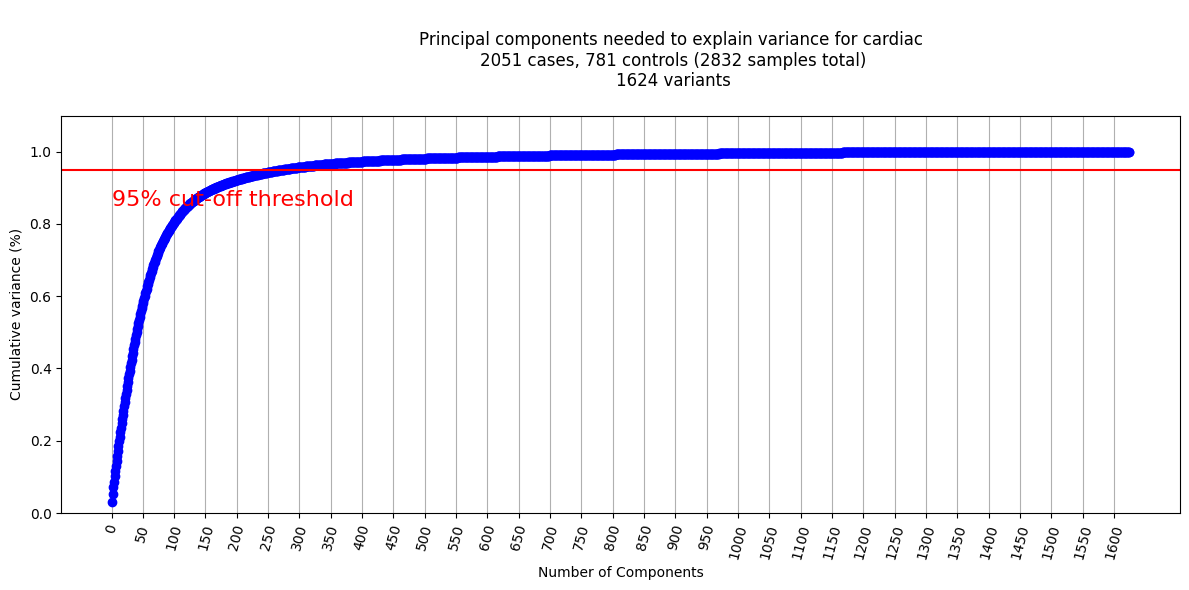

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


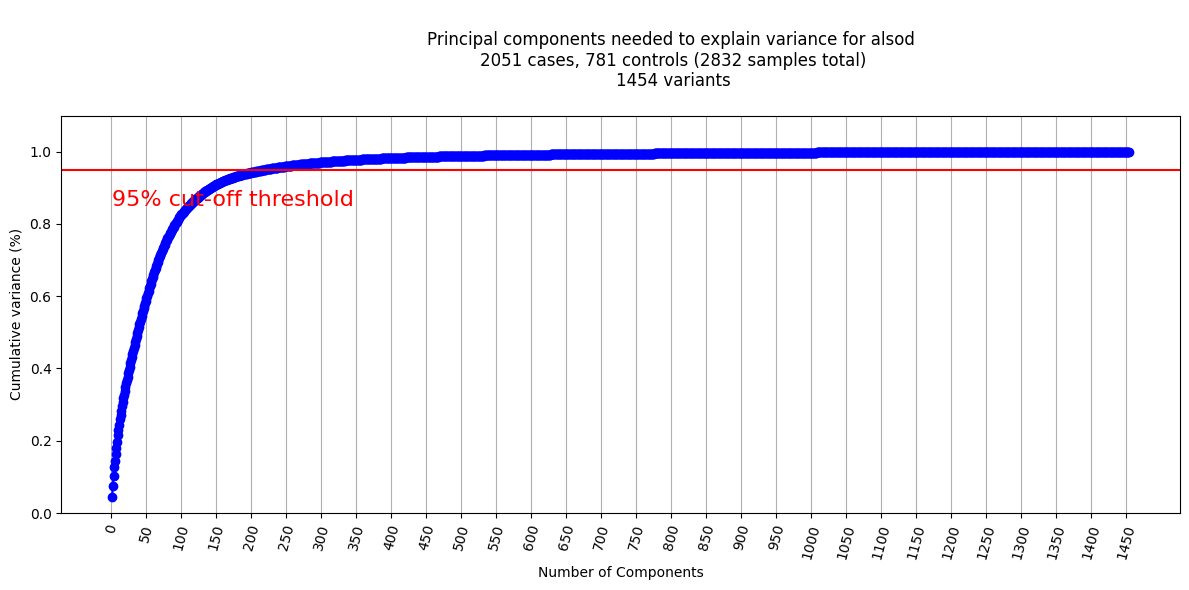

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


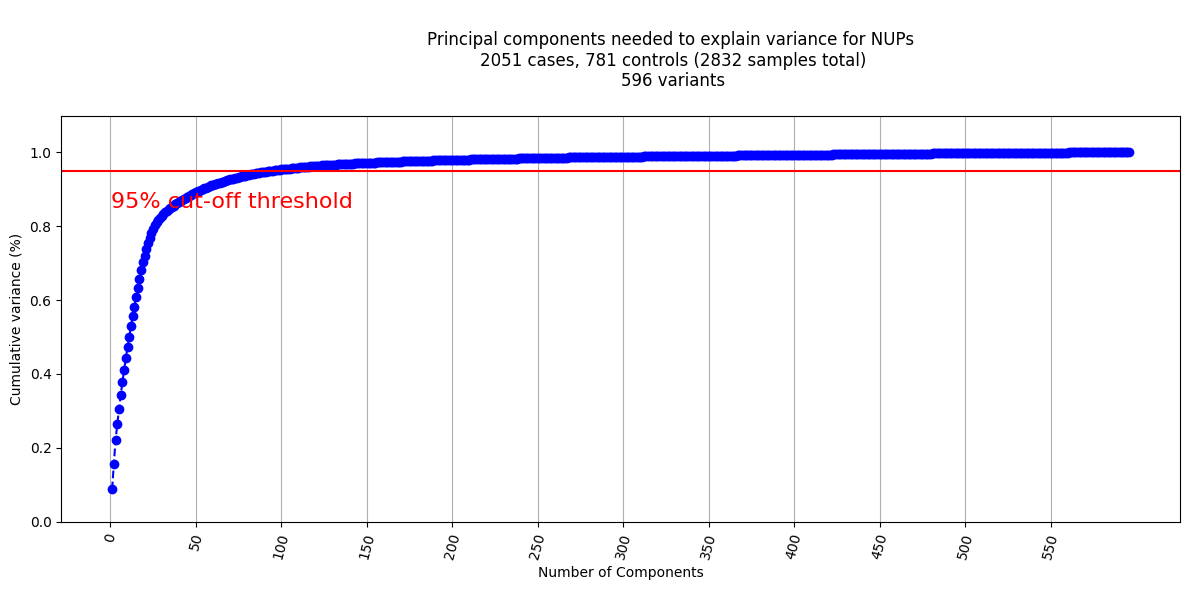

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


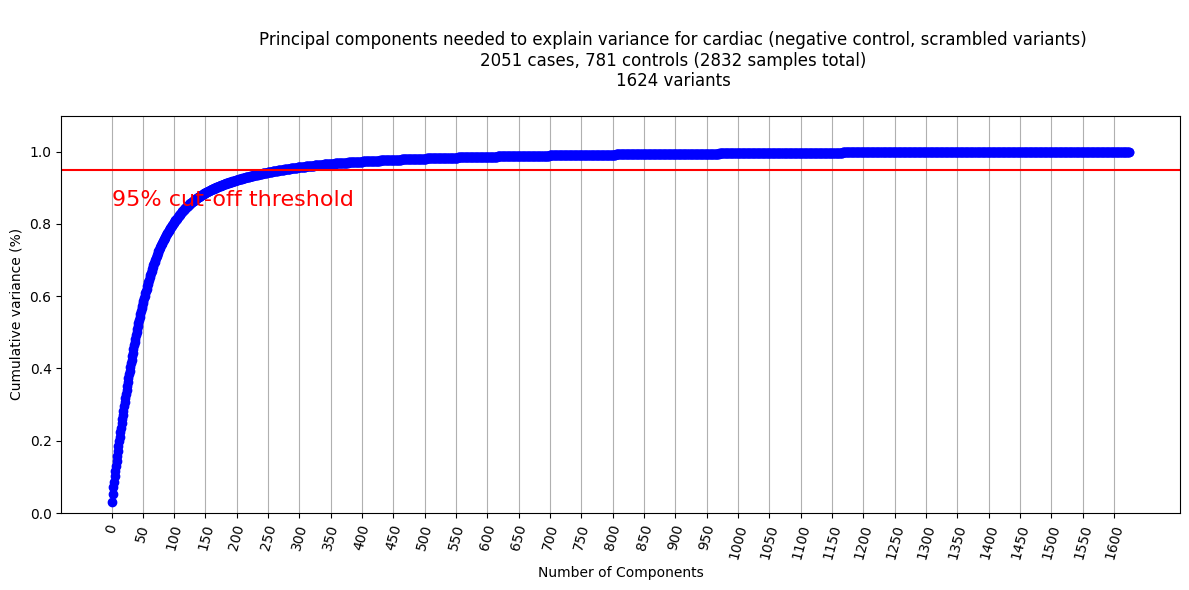

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


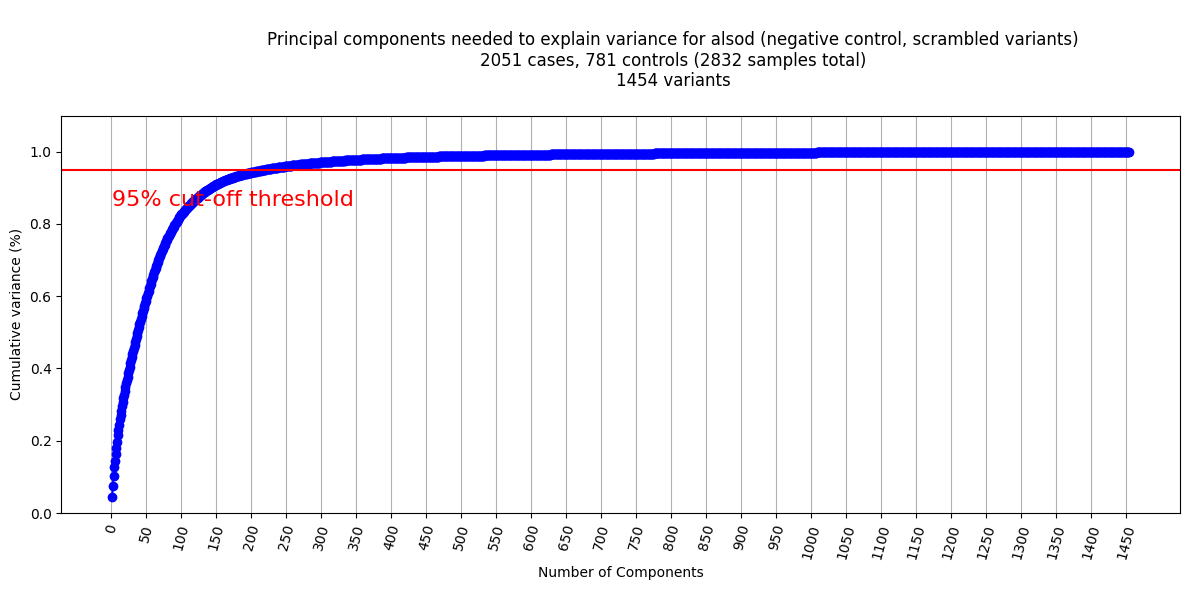

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


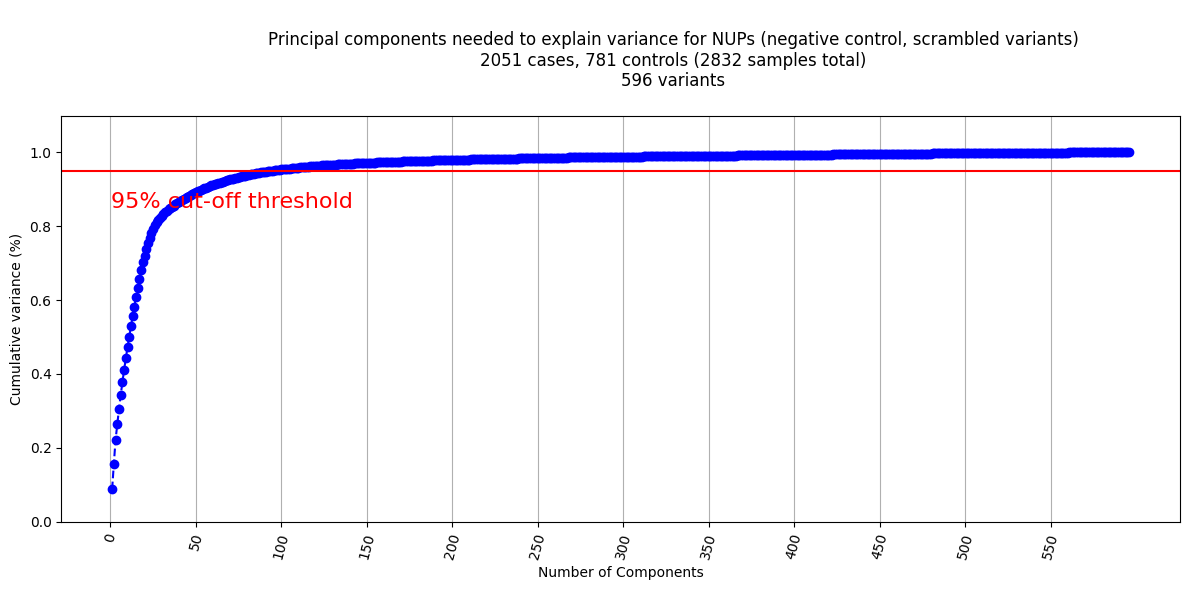

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

for type, dataframeDict in {'experimental': geneSetGenotypeDataframes, 'control': negativeControlDataframes}.items():
    for name, dataframe in dataframeDict.items():
        pca = PCA().fit(dataframe.T)

        plt.rcParams["figure.figsize"] = (12,6)

        fig, ax = plt.subplots()
        num_components = pca.n_components_  # Get the number of components
        xi = np.arange(1, num_components + 1, step=1)
        y = np.cumsum(pca.explained_variance_ratio_)

        plt.ylim(0.0,1.1)
        plt.plot(xi, y, marker='o', linestyle='--', color='b')

        plt.xlabel('Number of Components')
        plt.xticks(np.arange(0, num_components + 1, step=50)) #change from 0-based array index to 1-based human-readable label
        plt.ylabel('Cumulative variance (%)')
        plt.title(f"""
                    Principal components needed to explain variance for {name} {'(negative control, scrambled variants)' if type == 'control' else ''}
                    {min_sample_size if min_sample_size else len(commonCaseIDs)} cases, {min_sample_size if min_sample_size else len(commonControlIDs)} controls ({len(dataframe.T)} samples total)
                    {len(dataframe)} variants
                    """)


        plt.axhline(y=0.95, color='r', linestyle='-')
        plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

        ax.grid(axis='x')
        ax.tick_params(axis='x',  labelrotation = 75)
        plt.tight_layout()
        plt.show()


In [78]:
pacmapEmbedder = pacmap.PaCMAP(n_components=10, n_neighbors=None)  # let neighbors be inferred — max components is 100

num_components = 275
pcaEmbedder = PCA(n_components=num_components)

In [79]:
dataframe

CGND-HDA-04037  CGND-HDA-02163  CGND-HDA-02109  \
chrom position Gene                                                    
1     28535958 RCC1                0               0               0   
      53772404 NDC1                0               0               0   
      53797046 NDC1                0               0               0   
      53803951 NDC1                0               0               0   
      53809712 NDC1                0               0               0   
...                              ...             ...             ...   
22    45171663 NUP50               0               0               0   
      45178601 NUP50               0               0               0   
      45178636 NUP50               0               0               0   
      45178840 NUP50               0               0               0   
      45183515 NUP50               0               0               0   

                      CGND-HDA-04023  CGND-HDA-00802-b38  CGND-HDA-01282-b38  \
chrom position Gene                                                            
1     28535958 RCC1                0                   0                   0   
      53772404 NDC1                0                   0                   0   
      53797046 NDC1                0                   0                   0   
      53803951 NDC1                0                   0                   0   
      53809712 NDC1                0                   0                   0   
...                              ...                 ...                 ...   
22    45171663 NUP50               0                   0                   0   
      45178601 NUP50               0                   0                   0   
      45178636 NUP50               0                   0                   0   
      45178840 NUP50               0                   0                   0   
      45183515 NUP50               0                   0                   0   

                      CGND-HDA-03433  NA12760  CGND-HDA-01738  \
chrom position Gene                                             
1     28535958 RCC1                0        0             0.0   
      53772404 NDC1                1        0             0.0   
      53797046 NDC1                0        0             0.0   
      53803951 NDC1                0        0             0.0   
      53809712 NDC1                0        0             0.0   
...                              ...      ...             ...   
22    45171663 NUP50               0        0             0.0   
      45178601 NUP50               0        0             0.0   
      45178636 NUP50               0        0             0.0   
      45178840 NUP50               0        0             0.0   
      45183515 NUP50               0        0             0.0   

                      CGND-HDA-01210-b38  ...  CGND-HDA-04080  CGND-HDA-02467  \
chrom position Gene                       ...                                   
1     28535958 RCC1                    0  ...               0             0.0   
      53772404 NDC1                    0  ...               0             0.0   
      53797046 NDC1                    0  ...               0             0.0   
      53803951 NDC1                    0  ...               0             0.0   
      53809712 NDC1                    0  ...               0             0.0   
...                                  ...  ...             ...             ...   
22    45171663 NUP50                   0  ...               0             0.0   
      45178601 NUP50                   0  ...               0             0.0   
      45178636 NUP50                   0  ...               0             0.0   
      45178840 NUP50                   0  ...               0             0.0   
      45183515 NUP50                   0  ...               0             0.0   

                      CGND-HDA-03031  CGND-HDA-03572  CGND-HDA-03675  \
chrom position Gene                                                    


In [80]:
geneSetGenotypeDataframes['alsod']['CGND-HDA-01612']

chrom  position  Gene   
1      6468009   PLEKHG5    0
       6468260   PLEKHG5    0
       6468311   PLEKHG5    0
       6468408   PLEKHG5    1
       6468446   PLEKHG5    0
                           ..
22     30243764  LIF        0
       30243980  LIF        0
       30244004  LIF        0
X      43803358  MAOB       0
       67546320  AR         0
Name: CGND-HDA-01612, Length: 1454, dtype: int64

In [81]:
negativeControlDataframes['alsod']['CGND-HDA-01612']

chrom  position  Gene   
1      6468009   PLEKHG5    0
       6468260   PLEKHG5    0
       6468311   PLEKHG5    0
       6468408   PLEKHG5    0
       6468446   PLEKHG5    0
                           ..
22     30243764  LIF        0
       30243980  LIF        0
       30244004  LIF        0
X      43803358  MAOB       0
       67546320  AR         0
Name: CGND-HDA-01612, Length: 1454, dtype: int64

In [82]:
geneSetEmbeddingsPCA = {}
geneSetEmbeddingsPaCMAP = {}

for type, dataframeDict in {'experimental': geneSetGenotypeDataframes, 'control': negativeControlDataframes}.items():
    geneSetEmbeddingsPCA[type] = {}
    geneSetEmbeddingsPaCMAP[type] = {}
    
    for setType, ids in {'case': commonCaseIDs, 'control': commonControlIDs, 'all': commonCaseIDs + commonControlIDs}.items():
        geneSetEmbeddingsPCA[type][setType] = {}  # Initialize setType dict here
        geneSetEmbeddingsPaCMAP[type][setType] = {}
        
        for name, dataframe in dataframeDict.items():
            # Initialize the gene set (name) dict inside the setType loop but outside the gene set loop
            geneSetEmbeddingsPCA[type][setType][name] = pcaEmbedder.fit_transform(dataframe.T.loc[ids])  # transpose to align samples along rows
            #geneSetEmbeddingsPaCMAP[type][setType][name] = pacmapEmbedder.fit_transform(dataframe.T.loc[ids])


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

## Determine pairwise distances for each sample

In [83]:
from scipy.spatial import distance

# Define distance functions
distance_functions = {
    'cosine': distance.cosine,
    'manhattan': distance.cityblock,
    'minkowski': distance.minkowski,
    'mahalanobis': distance.mahalanobis,
}

def compute_covariance_matrix(data):
    covariance_matrix = np.cov(data, rowvar=False)
    regularization_term = 1e-5  # Small ridge regularization constant to add to the diagonal & handle singular matrices
    regularized_matrix = covariance_matrix + np.eye(covariance_matrix.shape[0]) * regularization_term
    return np.linalg.inv(regularized_matrix)

def compute_distance(distance_type, sample_data, paired_data, inv_cov_matrix=None):
    try:
        dist_function = distance_functions[distance_type]
        if distance_type == 'mahalanobis' and inv_cov_matrix is not None:
            return dist_function(sample_data, paired_data, inv_cov_matrix)
        else:
            return dist_function(sample_data, paired_data)
    except KeyError:
        raise ValueError(f'Unknown distance type {distance_type}')

def process_sample(distance_type, sample_index, data, ids, inv_cov_matrix=None):
    return {
        paired_sample: compute_distance(distance_type, data[sample_index], data[pairedSampleIndex], inv_cov_matrix)
        for pairedSampleIndex, paired_sample in enumerate(ids)
    }

In [84]:
from tqdm import tqdm
from joblib import Parallel, delayed

sampleDistanceDict = {}
distance_types = ['cosine', 'manhattan', 'mahalanobis']

for runType, dataframeDict in {'experimental': geneSetEmbeddingsPCA, 'control': geneSetEmbeddingsPCA}.items():
    sampleDistanceDict[runType] = {}
    for setType, ids in {'case': commonCaseIDs, 'control': commonControlIDs, 'all': commonCaseIDs + commonControlIDs}.items():
        sampleDistanceDict[runType][setType] = {}
        for distance_type in tqdm(distance_types):
            if distance_type == 'mahalanobis':
                inv_cov_matrices = {name: compute_covariance_matrix(data) for name, data in geneSetEmbeddingsPCA[runType][setType].items()}
            
            # Initialize the dictionary for the current distance type
            sampleDistanceDict[runType][setType][distance_type] = {}
            
            for name, data in geneSetEmbeddingsPCA[runType][setType].items():
                if distance_type == 'mahalanobis':
                    results = Parallel(n_jobs=-1)(delayed(process_sample)(distance_type, sample_index, data, ids, inv_cov_matrices[name]) 
                                                 for sample_index in range(len(ids)))
                else:
                    results = Parallel(n_jobs=-1)(delayed(process_sample)(distance_type, sample_index, data, ids) 
                                                 for sample_index in range(len(ids)))
                
                # Aggregate results into the dictionary for the current gene set
                sampleDistanceDict[runType][setType][distance_type][name] = {sample_name: res for sample_name, res in zip(ids, results)}


100%|██████████| 3/3 [02:22<00:00, 47.65s/it]


In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

for runType in sampleDistanceDict.keys():
    for distance_type in sampleDistanceDict[runType].keys():
        for gene_set_name, gene_set_data in sampleDistanceDict[runType][distance_type].items():
            # Create a DataFrame from the distance data
            distance_df = pd.DataFrame(gene_set_data)
            
            # Ensure the distance data is symmetric and the diagonal is zero
            for row in distance_df.index:
                for col in distance_df.columns:
                    distance_df.loc[row, col] = distance_df.loc[col, row] if row != col else 0
            
            # Create a color mapping for your samples
            sample_colors = distance_df.columns.map(lambda x: 'red' if x in commonCaseIDs else 'blue')
            
            # Generate a custom colormap for the heatmap values
            cmap = sns.diverging_palette(220, 20, as_cmap=True)
            
            # Create a clustermap
            cluster_map = sns.clustermap(distance_df, method='average', cmap=cmap, row_colors=sample_colors, col_colors=sample_colors)
            
            # Remove x and y tick labels from the heatmap
            cluster_map.ax_heatmap.set_xticklabels([])
            cluster_map.ax_heatmap.set_yticklabels([])

            # Set the title
            plt.title(f"""
                {'(Negative control, scrambled samples) 'if runType=='control' else ''}PCA embedding of {gene_set_name} genes
                {distance_type.capitalize()} distance between {min_sample_size} cases and {min_sample_size} controls (European) 
                {len(geneSetGenotypeDataframes[gene_set_name].T)} total samples, {len(geneSetGenotypeDataframes[gene_set_name])} variants over 250 components""")
            
            # Create legend
            red_patch = mpatches.Patch(color='red', label='Case')
            blue_patch = mpatches.Patch(color='blue', label='Control')
            # Adjust legend location
            plt.legend(handles=[red_patch, blue_patch], bbox_to_anchor=(0, 1), loc=1, borderaxespad=0.)
            
            
            # Show the plot
            plt.show()


KeyError: 'CGND-HDA-03265'

In [117]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr

def compute_per_sample_correlation(matrix1, matrix2):
    correlations = {}
    for sample_id in matrix1.columns:
        vector1 = matrix1[sample_id].values
        vector2 = matrix2[sample_id].values
        correlation, p_value = spearmanr(vector1, vector2)
        correlations[sample_id] = correlation
    return correlations

def compute_correlation(distance_type, gene_set1, gene_set2, sampleDistanceDict):
    distance_matrix1 = pd.DataFrame(sampleDistanceDict[distance_type][gene_set1])
    distance_matrix2 = pd.DataFrame(sampleDistanceDict[distance_type][gene_set2])
    
    correlations = compute_per_sample_correlation(distance_matrix1, distance_matrix2)
    return gene_set1, gene_set2, correlations

correlation_results = {}

for runType in sampleDistanceDict.keys():
    correlation_results[runType] = {}
    for setType, ids in {'case': commonCaseIDs, 'control': commonControlIDs, 'all': commonCaseIDs + commonControlIDs}.items():
        correlation_results[runType][setType] = {}
        for distance_type in sampleDistanceDict[runType][setType].keys():
                gene_set_names = list(sampleDistanceDict[runType][setType][distance_type].keys())
                
                for gene_set1 in gene_set_names:
                    for gene_set2 in gene_set_names:
                        if gene_set1 != gene_set2 and (distance_type, gene_set2, gene_set1) not in correlation_results[runType][setType]:
                            gene_set1, gene_set2, correlations = compute_correlation(distance_type, gene_set1, gene_set2, sampleDistanceDict[runType][setType])
                            
                            # Store in dictionary with sample ID keys:
                            correlation_results[runType][setType][(distance_type, gene_set1, gene_set2)] = correlations


In [118]:
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.io as pio
from plotly.offline import plot
import plotly.express as px
import pandas as pd

pio.renderers.default = 'browser'

color_scale = px.colors.qualitative.Set1
unique_pairs = set()
unique_distance_types = set()

for runType in correlation_results:
    for setType in correlation_results[runType]:
        for key in correlation_results[runType][setType]:
            unique_pairs.add((key[1], key[2]))
            unique_distance_types.add(key[0])

pair_color = {pair: color_scale[i % len(color_scale)] for i, pair in enumerate(unique_pairs)}

for setType in ['case', 'control', 'all']:
    fig = sp.make_subplots(rows=len(correlation_results.keys()), cols=len(unique_distance_types),
                           subplot_titles=[f"{'scrambledSamples-' if runType == 'control' else ''}{distance_type}" for runType in correlation_results for distance_type in unique_distance_types])
    
    global_min = min([min(correlations.values()) for runType in correlation_results for key, correlations in correlation_results[runType][setType].items()])
    global_max = max([max(correlations.values()) for runType in correlation_results for key, correlations in correlation_results[runType][setType].items()])
    bin_width = (global_max - global_min) / 100

    row = 1
    for runType in correlation_results:
        currentDataframe = negativeControlDataframes if runType == 'control' else geneSetGenotypeDataframes
        col = 1
        for distance_type in unique_distance_types:
            data_points = []
            for key, correlations in correlation_results[runType][setType].items():
                if key[0] == distance_type:
                    for correlation_value in correlations.values():
                        data_points.append({'Correlation': correlation_value, 'Gene Set Pair': f"{key[1]} vs {key[2]} ({len(currentDataframe[key[1]])} vs {len(currentDataframe[key[2]])} variants)"})

            df = pd.DataFrame(data_points)

            for pair in unique_pairs:
                pair_label = f"{pair[0]} vs {pair[1]} ({len(currentDataframe[pair[0]])} vs {len(currentDataframe[pair[1]])} variants)"
                pair_data = df[df['Gene Set Pair'] == pair_label]
                if not pair_data.empty:
                    fig.add_trace(go.Histogram(x=pair_data['Correlation'], name=pair_label, marker_color=pair_color[pair], showlegend=(row == 1 and col == 1), opacity=0.8, xbins=dict(start=global_min, end=global_max, size=bin_width)), row=row, col=col)
                    fig.update_xaxes(range=[global_min, global_max])
            col += 1
        row += 1

    title = f"Sample Correlations, {len(commonCaseIDs + commonControlIDs) if setType == 'all' else len(commonCaseIDs) if setType == 'case' else len(commonControlIDs)} European {('samples' if setType == 'all' else setType+'s')} {(('(' + str(len(commonCaseIDs)) if not balance else str(min_sample_size)) + ' cases, ' + (str(len(commonControlIDs)) if not balance else str(min_sample_size)) + ' controls), ') if setType == 'all' else ''}over {num_components} principal components"

    fig.update_layout(height=400*len(correlation_results.keys()), width=800*len(unique_distance_types), title_text=title, barmode='overlay')
    
    plot(fig, filename=f'correlation_histograms_{setType}.html')


In [293]:
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.io as pio
from plotly.offline import plot
import plotly.express as px
import pandas as pd

pio.renderers.default = 'browser'

color_scale = px.colors.qualitative.Set1

unique_run_types = list(sampleDistanceDict.keys())
unique_distance_types = list(distance_types)
unique_gene_sets = list(next(iter(sampleDistanceDict.values())).values())[0].keys()

fig = sp.make_subplots(rows=len(unique_run_types), cols=len(unique_distance_types), subplot_titles=[f"{run}-{dist}" for run in unique_run_types for dist in unique_distance_types])

for run_idx, run_type in enumerate(unique_run_types, start=1):
    for dist_idx, dist_type in enumerate(unique_distance_types, start=1):
        x_values = []
        y_values = []
        hover_texts = []

        for gene_set in unique_gene_sets:
            sample_distances = sampleDistanceDict[run_type][dist_type][gene_set]
            for sample1, dist1 in sample_distances.items():
                for sample2, dist2 in sample_distances.items():
                    x_values.append(dist1)
                    y_values.append(dist2)
                    hover_texts.append(f"Samples: {sample1} - {sample2}")

        df = pd.DataFrame({'x': x_values, 'y': y_values, 'HoverText': hover_texts})
        fig.add_trace(go.Scatter(x=df['x'], y=df['y'], mode='markers', hovertext=df['HoverText'], opacity=0.8), row=run_idx, col=dist_idx)

fig.update_layout(height=400*len(unique_run_types), width=800*len(unique_distance_types), title_text="Sample Distances")
plot(fig, filename='distance_scatterplots.html')


KeyboardInterrupt: 

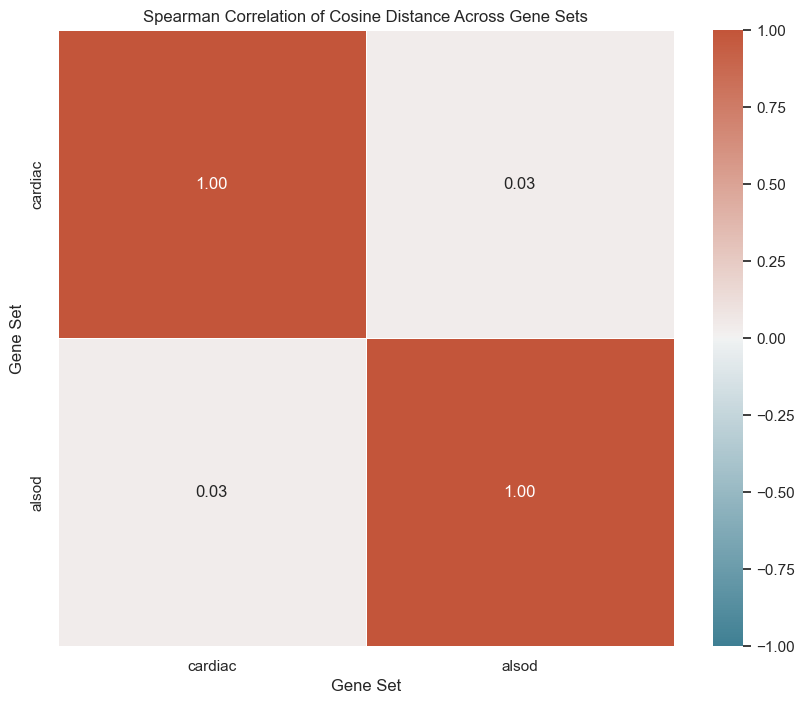

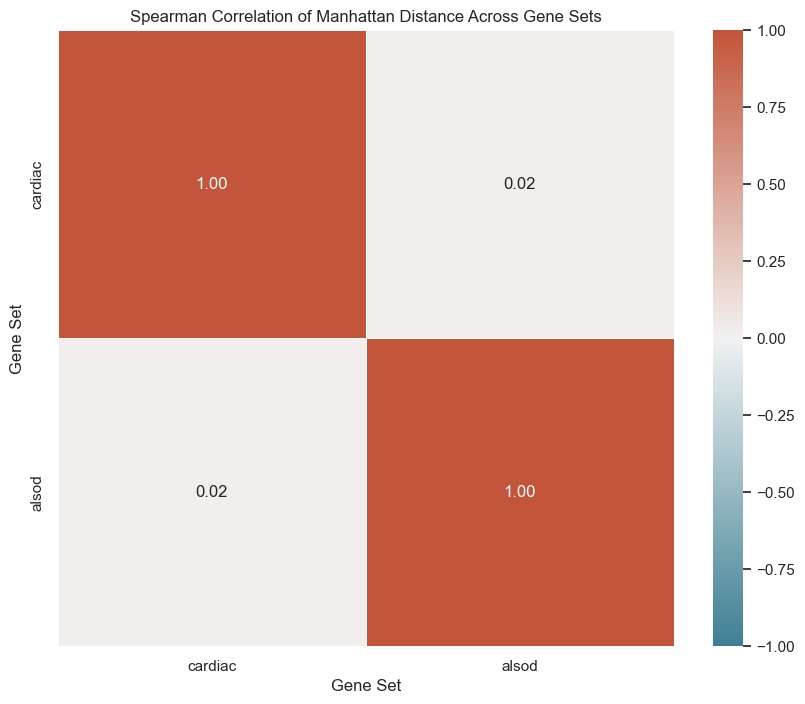

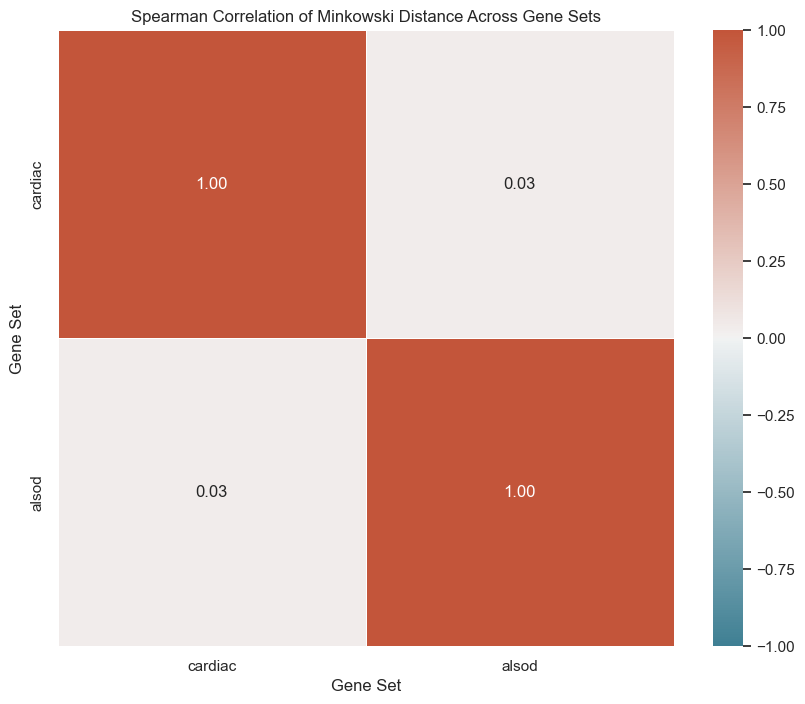

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="white")

# Loop through each distance type to create a separate heatmap
for distance_type, correlation_matrix in correlation_results.items():
    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(correlation_matrix.astype(float), cmap=cmap, vmax=1, vmin=-1,
                square=True, linewidths=.5, annot=True, fmt=".2f")

    # Set titles and labels
    plt.title(f'Spearman Correlation of {distance_type.capitalize()} Distance Across Gene Sets')
    plt.xlabel('Gene Set')
    plt.ylabel('Gene Set')

    # Show plot
    plt.show()


## Gene-level sample clusters

In [93]:
import pandas as pd


geneLevelGenotypesPath = "../adhoc analysis/nupsGeneLevelGenotypes.csv"

base_dir = 'projects'
project_name = 'ALS-NUPs-variant-1MAF__1'
sampleResultsPath = f"{base_dir}/{project_name}/pooledSampleResults.csv"

geneSetName = 'NUPs'

genotypeData = pd.read_csv(geneLevelGenotypesPath, index_col=['Gene'], engine="pyarrow")
sampleResults = pd.read_csv(sampleResultsPath)

In [87]:
genotypeData

,CGND-HDA-04091,CGND-HDA-04089,CGND-HDA-04086,CGND-HDA-04085,CGND-HDA-04084,CGND-HDA-04083,CGND-HDA-04082,CGND-HDA-04081,CGND-HDA-04080,CGND-HDA-04079,...,NA21097,NA21100,NA21105,NA20878,NA20885,NA21143,NA21112,NA21117,NA21124,NA21129
Gene,,,,,,,,,,,,,,,,,,,,,
RCC1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NDC1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.058824,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000
TPR,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.040000,0.000000,...,0.020000,0.020000,0.000000,0.020000,0.000000,0.000000,0.000000,0.020000,0.020000,0.000000
LBR,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,...,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.000000,0.035714,0.035714,0.035714
NUP133,0.051282,0.000000,0.000000,0.000000,0.051282,0.000000,0.000000,0.051282,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.051282,0.000000,0.000000,0.000000,0.000000
AHCTF1,0.000000,0.011905,0.023810,0.023810,0.011905,0.023810,0.000000,0.023810,0.023810,0.011905,...,0.000000,0.011905,0.000000,0.023810,0.000000,0.023810,0.035714,0.011905,0.023810,0.011905
XPO1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RANBP2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.011364,0.000000,0.000000,0.000000,0.011364,0.011364,0.011364,0.011364
NUP35,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [88]:
sampleResults

,id,probability_mean,probabilities_list,probability_std,accuracy_mean,accuracy_std,draw_count,label,prediction_most_frequent
0,CGND-HDA-01136,0.525921,"[0.5, 0.5, 0.5, 0.48764248826228357, 0.4948891...",0.060325,0.610169,0.398218,59,1,1
1,CGND-HDA-01168,0.519279,"[0.4862348676648253, 0.5, 0.49463468602187266,...",0.070110,0.448276,0.425747,58,1,0
2,CGND-HDA-01207,0.540340,"[0.49378094920847304, 0.49089822179209214, 0.4...",0.033366,0.400000,0.333333,40,0,1
3,CGND-HDA-01341,0.475600,"[0.5, 0.4846869478650541, 0.5088099885782366, ...",0.056107,0.220588,0.380601,68,1,0
4,CGND-HDA-01342,0.470690,"[0.4714730689374518, 0.4885415434857162, 0.478...",0.103044,0.316190,0.444648,1050,1,0
...,...,...,...,...,...,...,...,...,...
4198,NA21137,0.449978,"[0.5, 0.4915356545243718, 0.47536891814758514,...",0.054483,0.866667,0.343303,60,0,0
4199,NA21141,0.476989,"[0.4942665651403924, 0.4974431724921119, 0.454...",0.069206,0.857143,0.328372,70,0,0
4200,NA21142,0.516527,"[0.515971838291409, 0.5375141286794923, 0.5205...",0.097327,0.583333,0.400149,60,0,0
4201,NA21143,0.503174,"[0.5, 0.5, 0.5, 0.5, 0.5125281299110702, 0.507...",0.013969,0.500000,0.475317,30,0,1


In [89]:
import os

# Creating an empty dataframe to store all the values
holdout_data = pd.DataFrame()
euro_data = pd.DataFrame()

# Looping over all bootstrap directories
for nth_bootstrap in os.listdir(f'{base_dir}/{project_name}/bootstraps/'):
    bootstrap_dir = f'{base_dir}/{project_name}/bootstraps/{nth_bootstrap}/LogisticRegression/'
    file_paths = [os.path.join(bootstrap_dir, path) for path in ['holdoutEmbedding.csv', "embedding.csv"]]
    
    # Check if the file exists
    if all(os.path.exists(file_path) for file_path in file_paths):
        # Reading the CSV file into a dataframe, considering the two-level header
        current_holdout = pd.read_csv(file_paths[0], header=[0, 1, 2], index_col=0)
        current_euro = pd.read_csv(file_paths[1], header=[0, 1, 2], index_col=0)
        
        # Renaming the index using the first column and dropping the first column
        # data.index = data[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')]
        # data = data.drop(('Unnamed: 0_level_0', 'Unnamed: 0_level_1'), axis=1)
        
        # # Dropping the first row since it's unnecessary
        # data = data.drop(index='feature_name')
        
        # Appending the data to the main dataframe
        holdout_data = pd.concat([holdout_data, current_holdout], axis=0,)
        euro_data = pd.concat([euro_data, current_euro], axis=0,)
euro_samples = euro_data.index.unique()
holdout_samples = holdout_data.index.unique()

In [90]:
holdout_samples

Index(['CGND-HDA-02580', 'CGND-HDA-02231', 'CGND-HDA-02608', 'CGND-HDA-03710',
       'CGND-HDA-02038', 'CGND-HDA-03711', 'CGND-HDA-02944', 'CGND-HDA-02947',
       'CGND-HDA-02111', 'CGND-HDA-01372',
       ...
       'HG02786', 'NA18881', 'NA18963', 'HG03258', 'NA19399', 'HG03366',
       'NA19914', 'NA19764', 'HG04059', 'NA19679'],
      dtype='object', length=1416)

In [91]:
euro_samples

Index(['CGND-HDA-04091', 'CGND-HDA-04086', 'CGND-HDA-04085', 'CGND-HDA-04084',
       'CGND-HDA-04081', 'CGND-HDA-04079', 'CGND-HDA-04077', 'CGND-HDA-04075',
       'CGND-HDA-04074', 'CGND-HDA-04073',
       ...
       'CGND-HDA-02106', 'CGND-HDA-01880', 'CGND-HDA-01711', 'CGND-HDA-01492',
       'CGND-HDA-03502', 'CGND-HDA-01791', 'CGND-HDA-04002', 'CGND-HDA-02318',
       'CGND-HDA-01504', 'CGND-HDA-02666'],
      dtype='object', name='id', length=2030)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


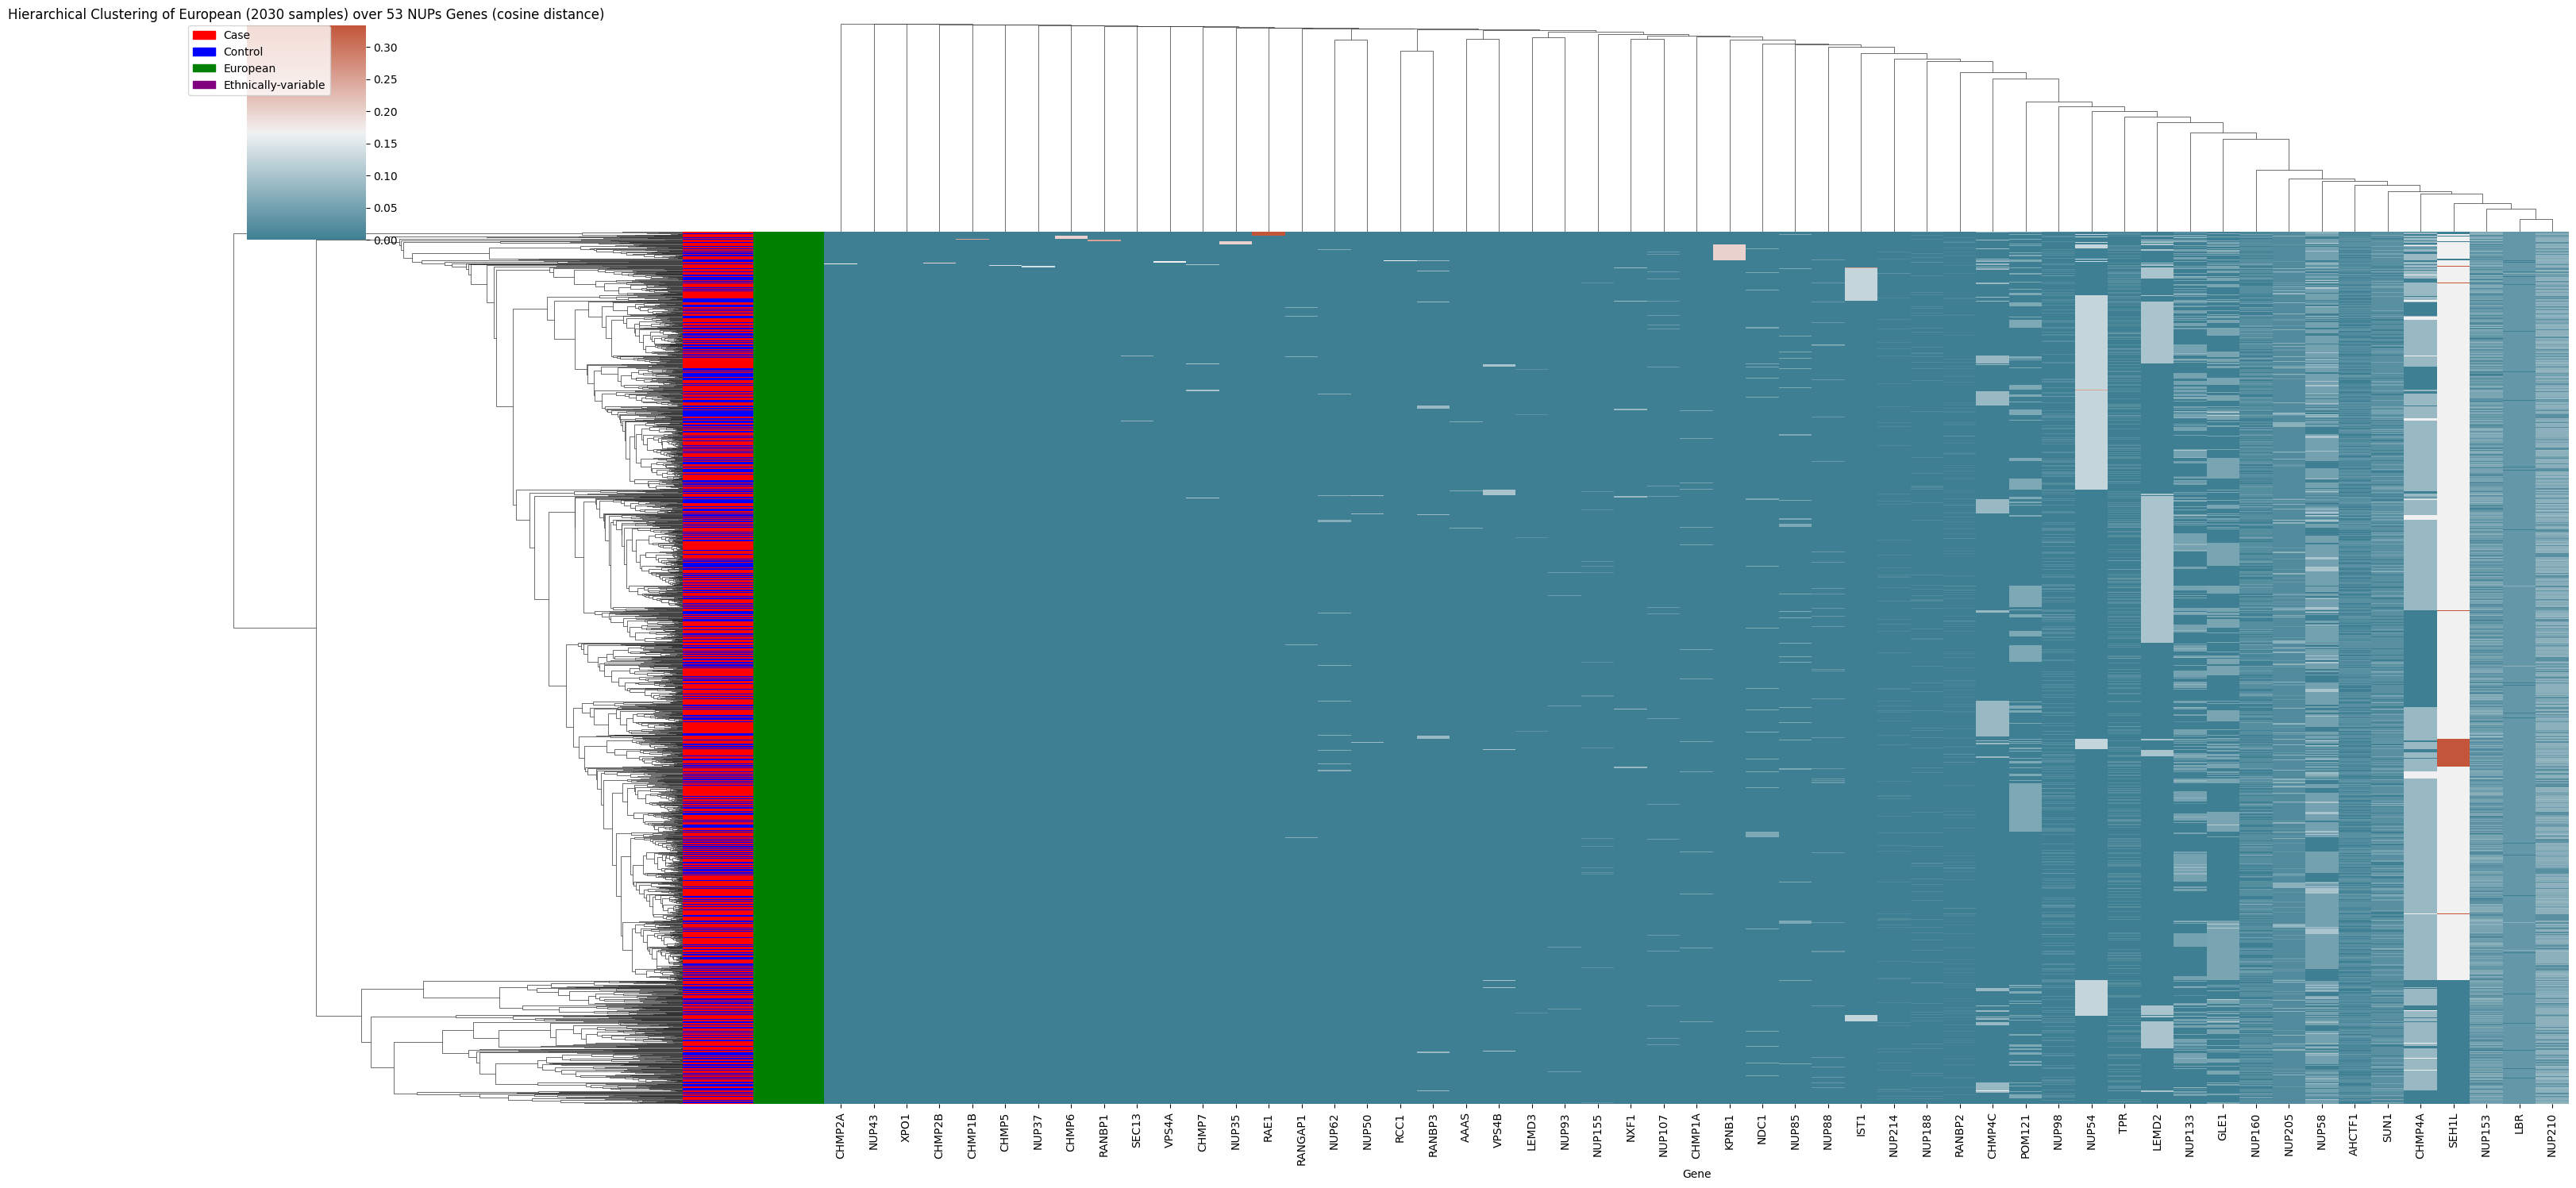

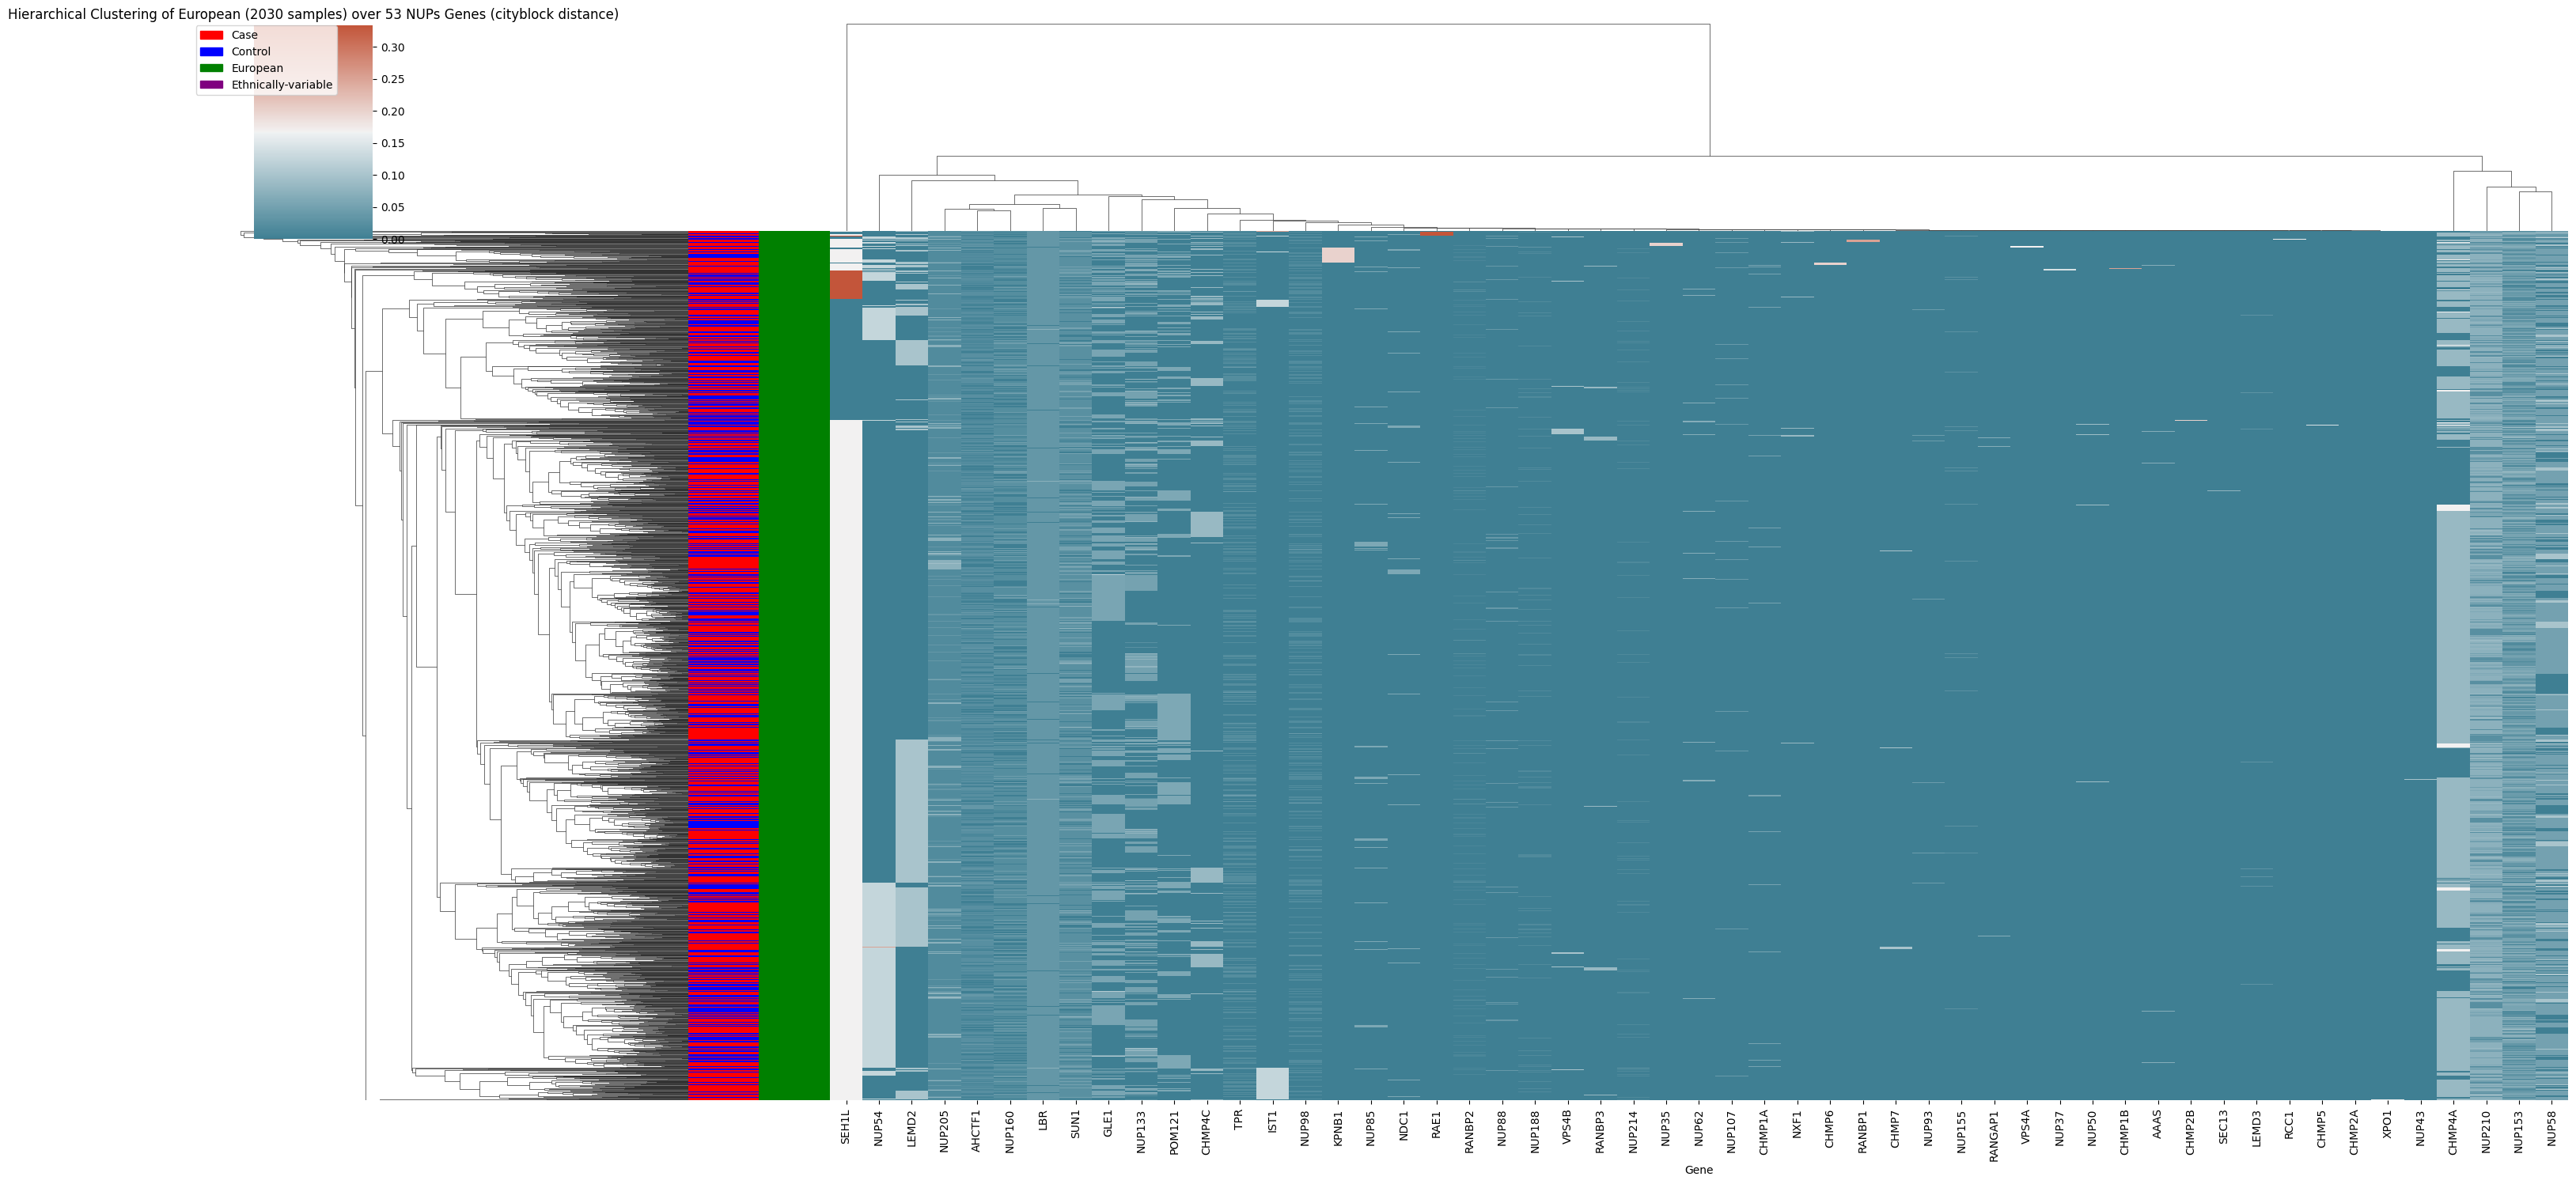

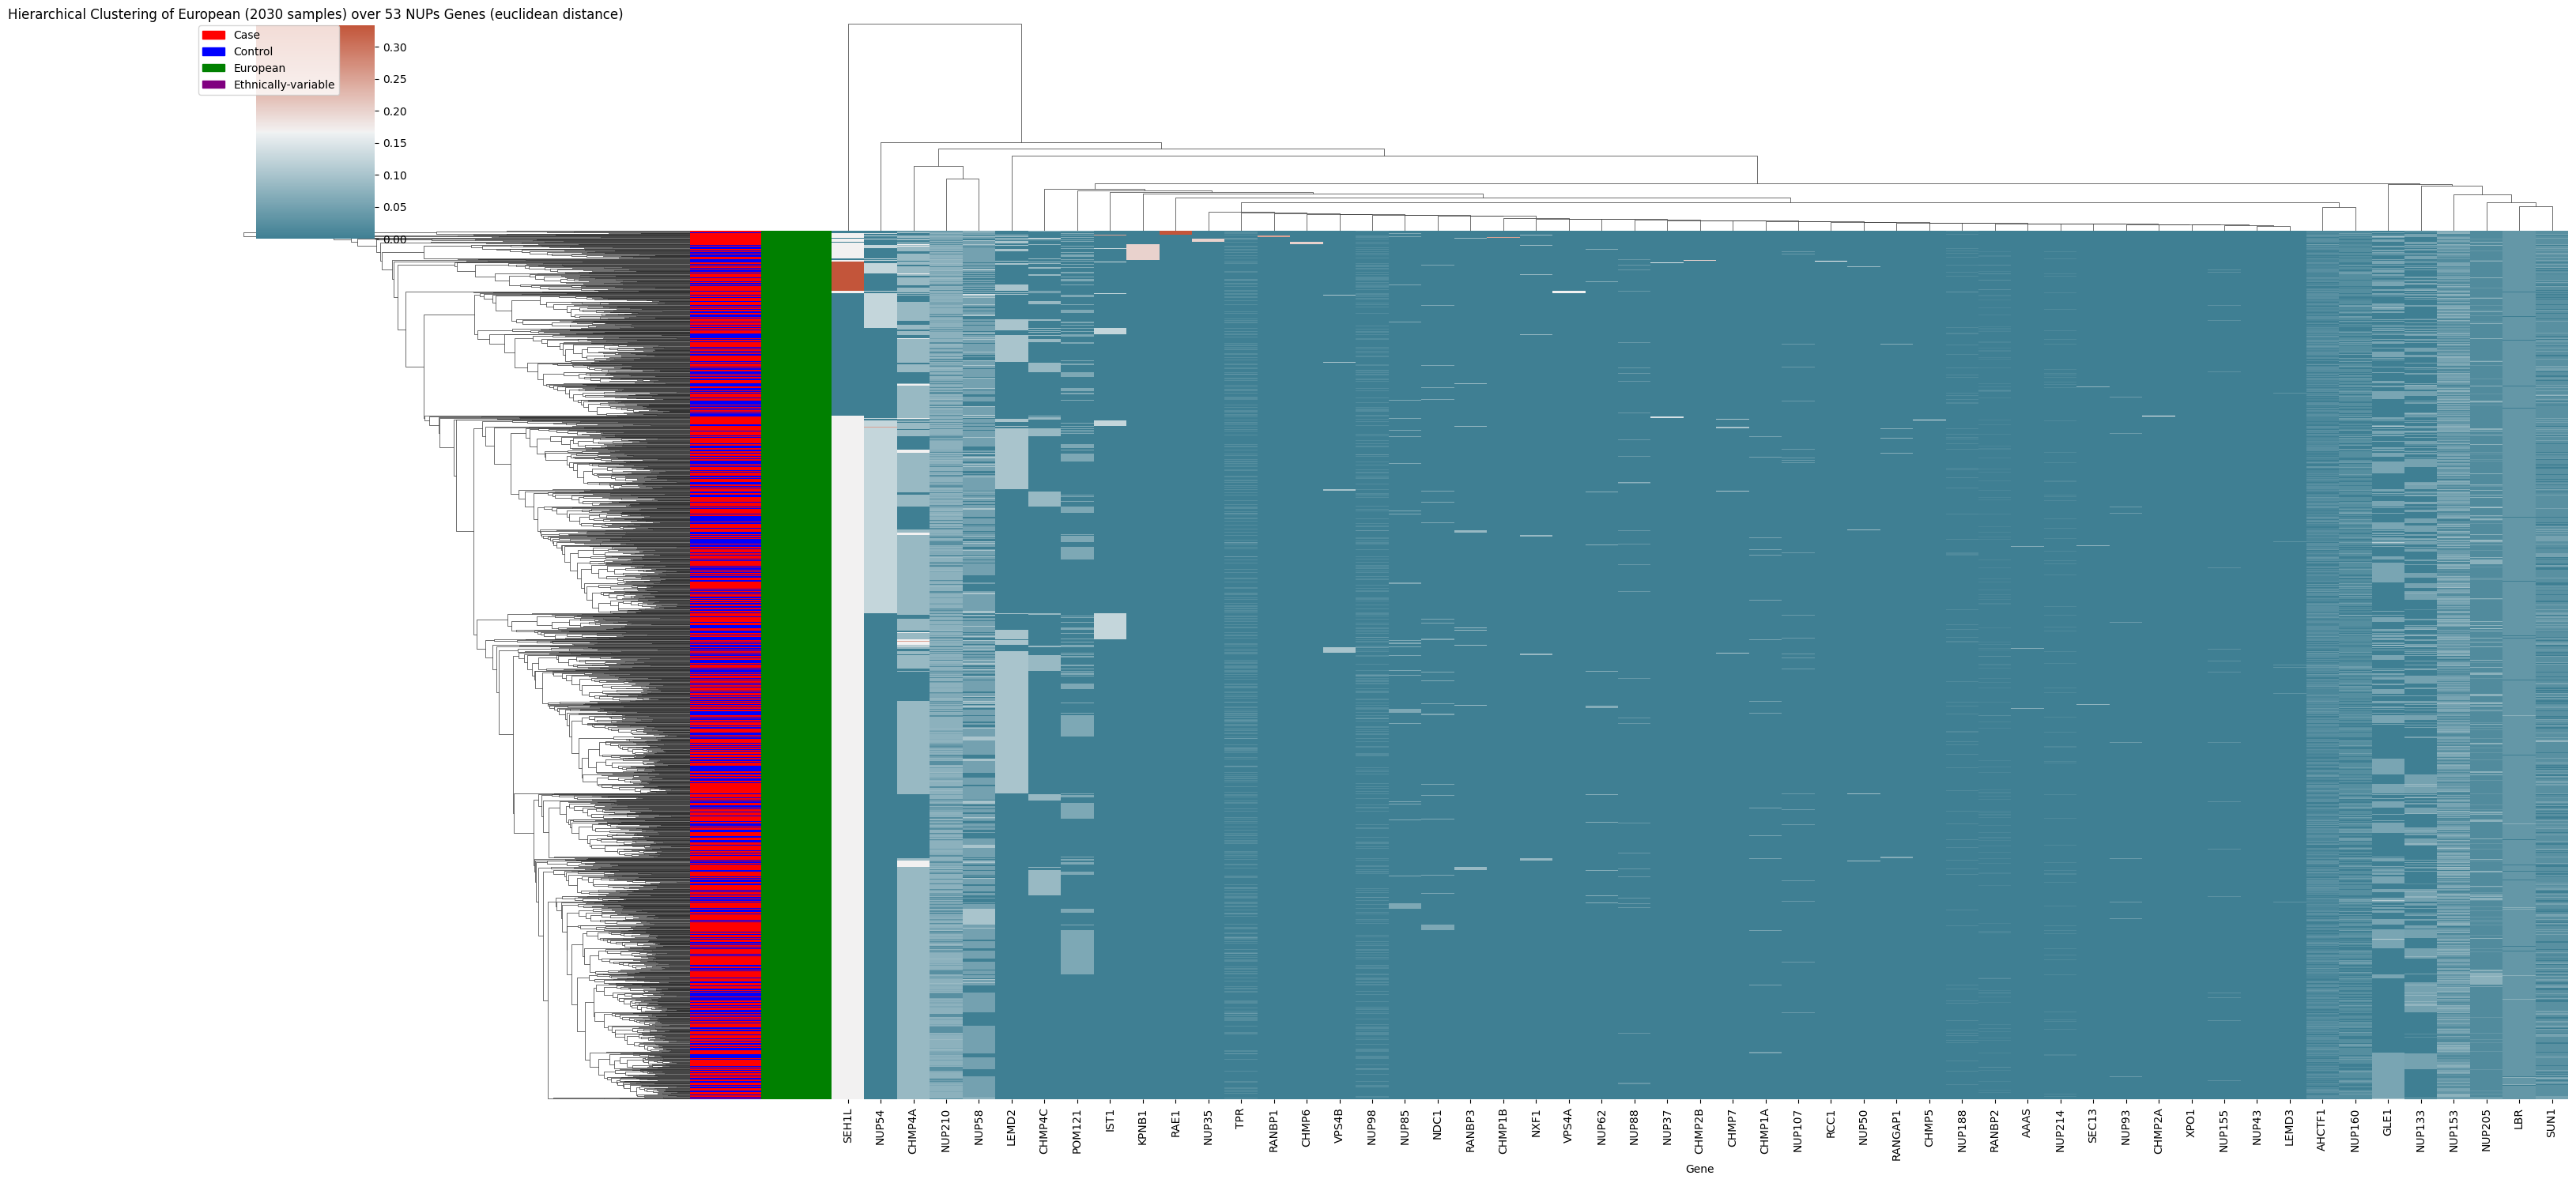


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


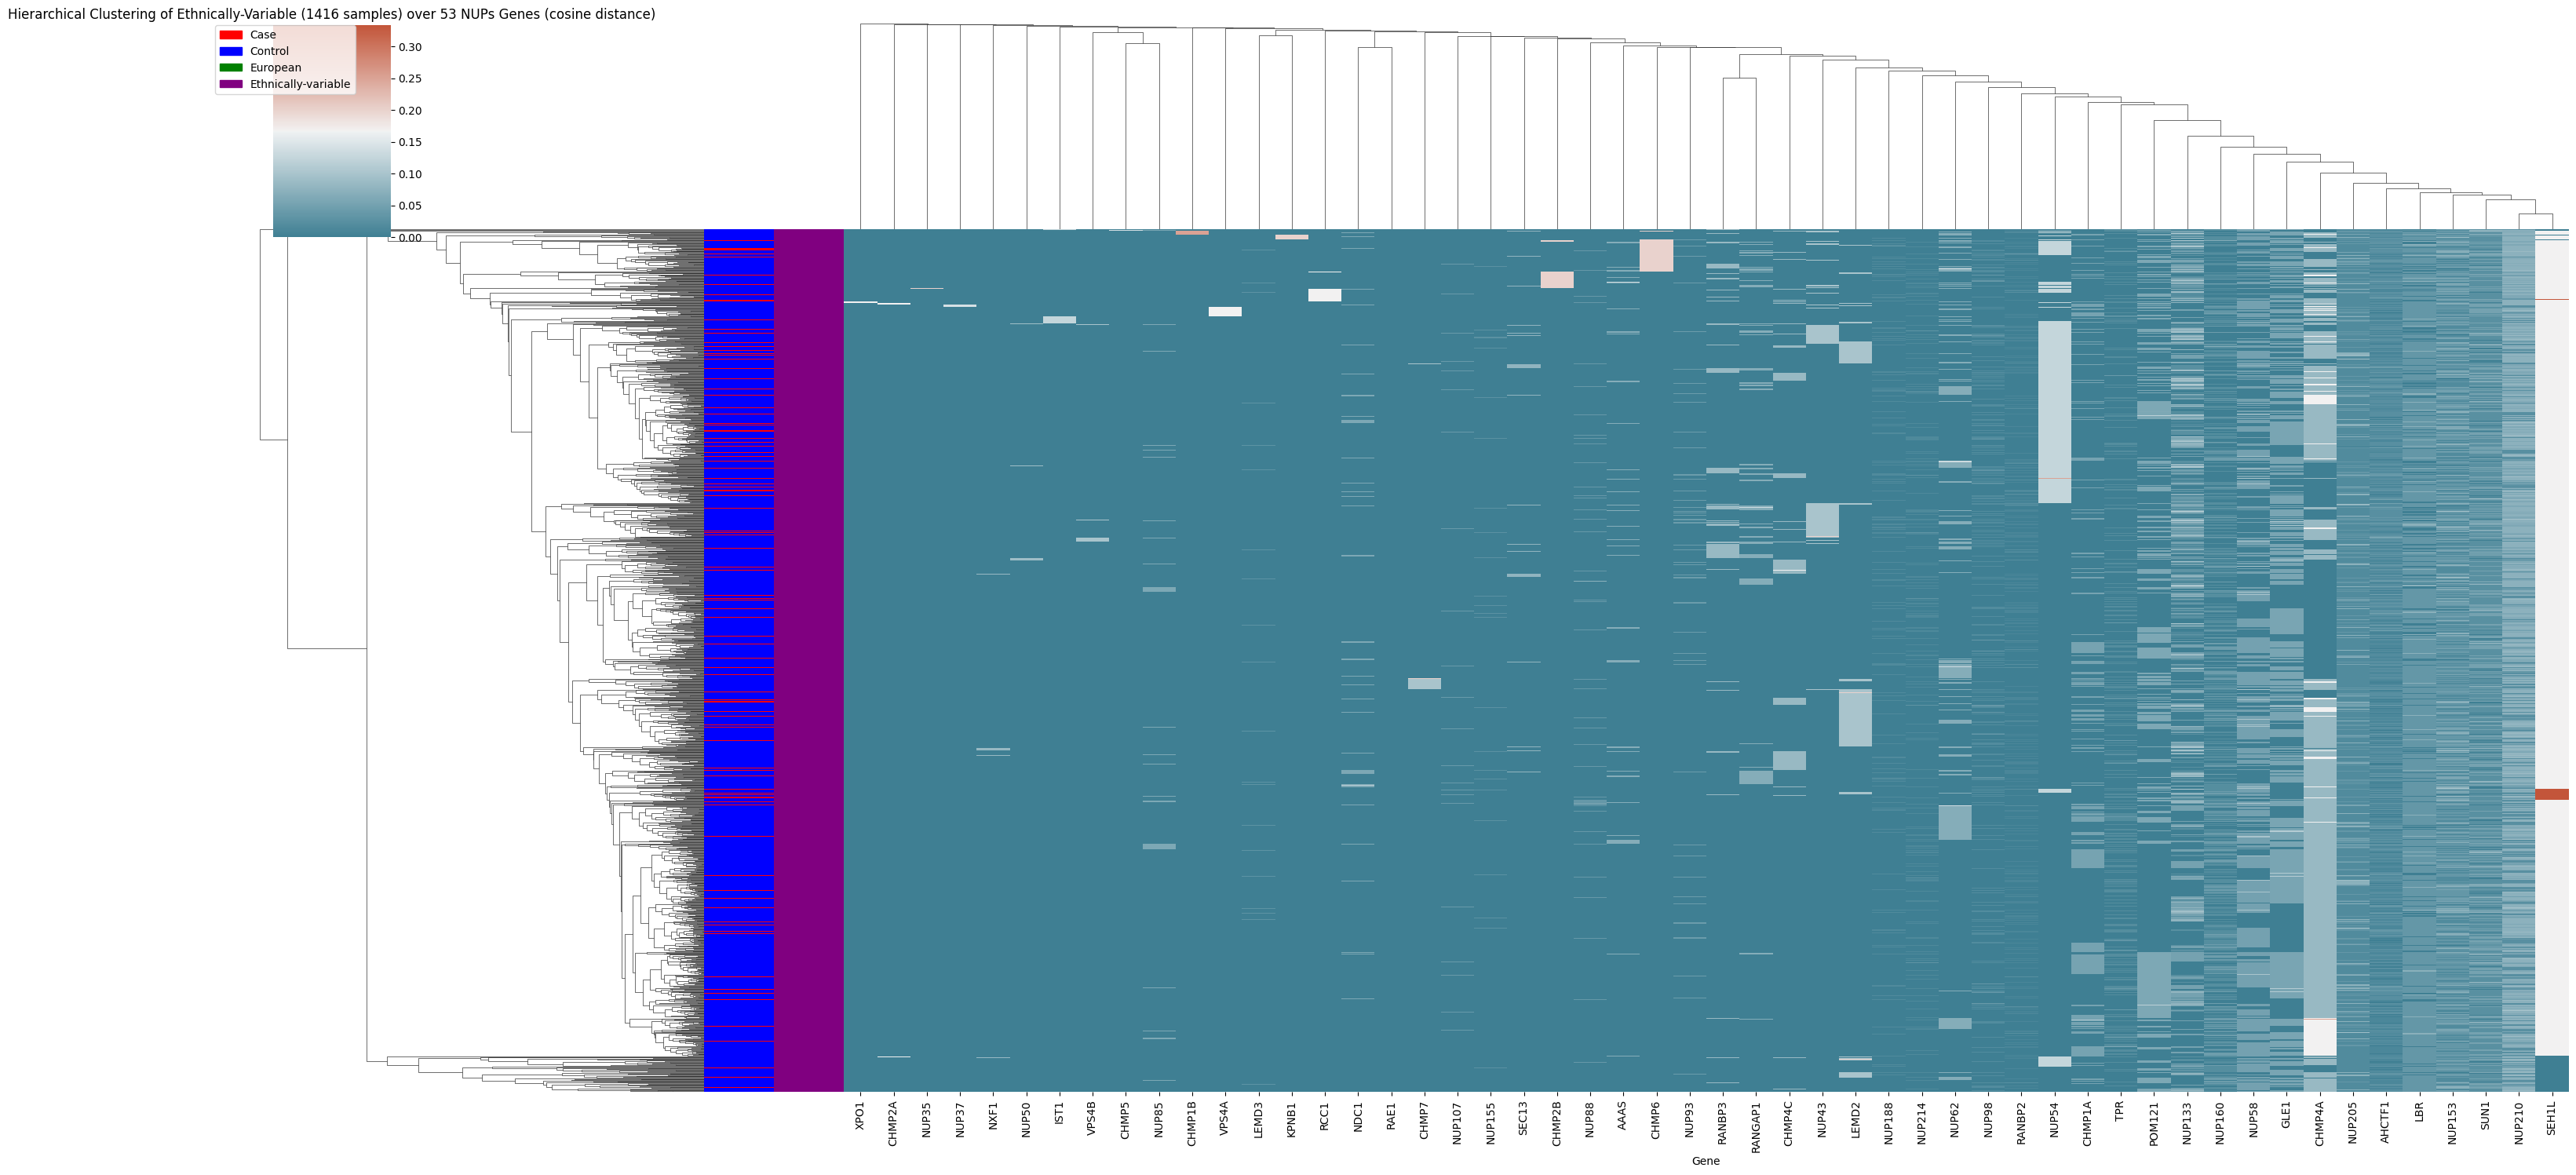

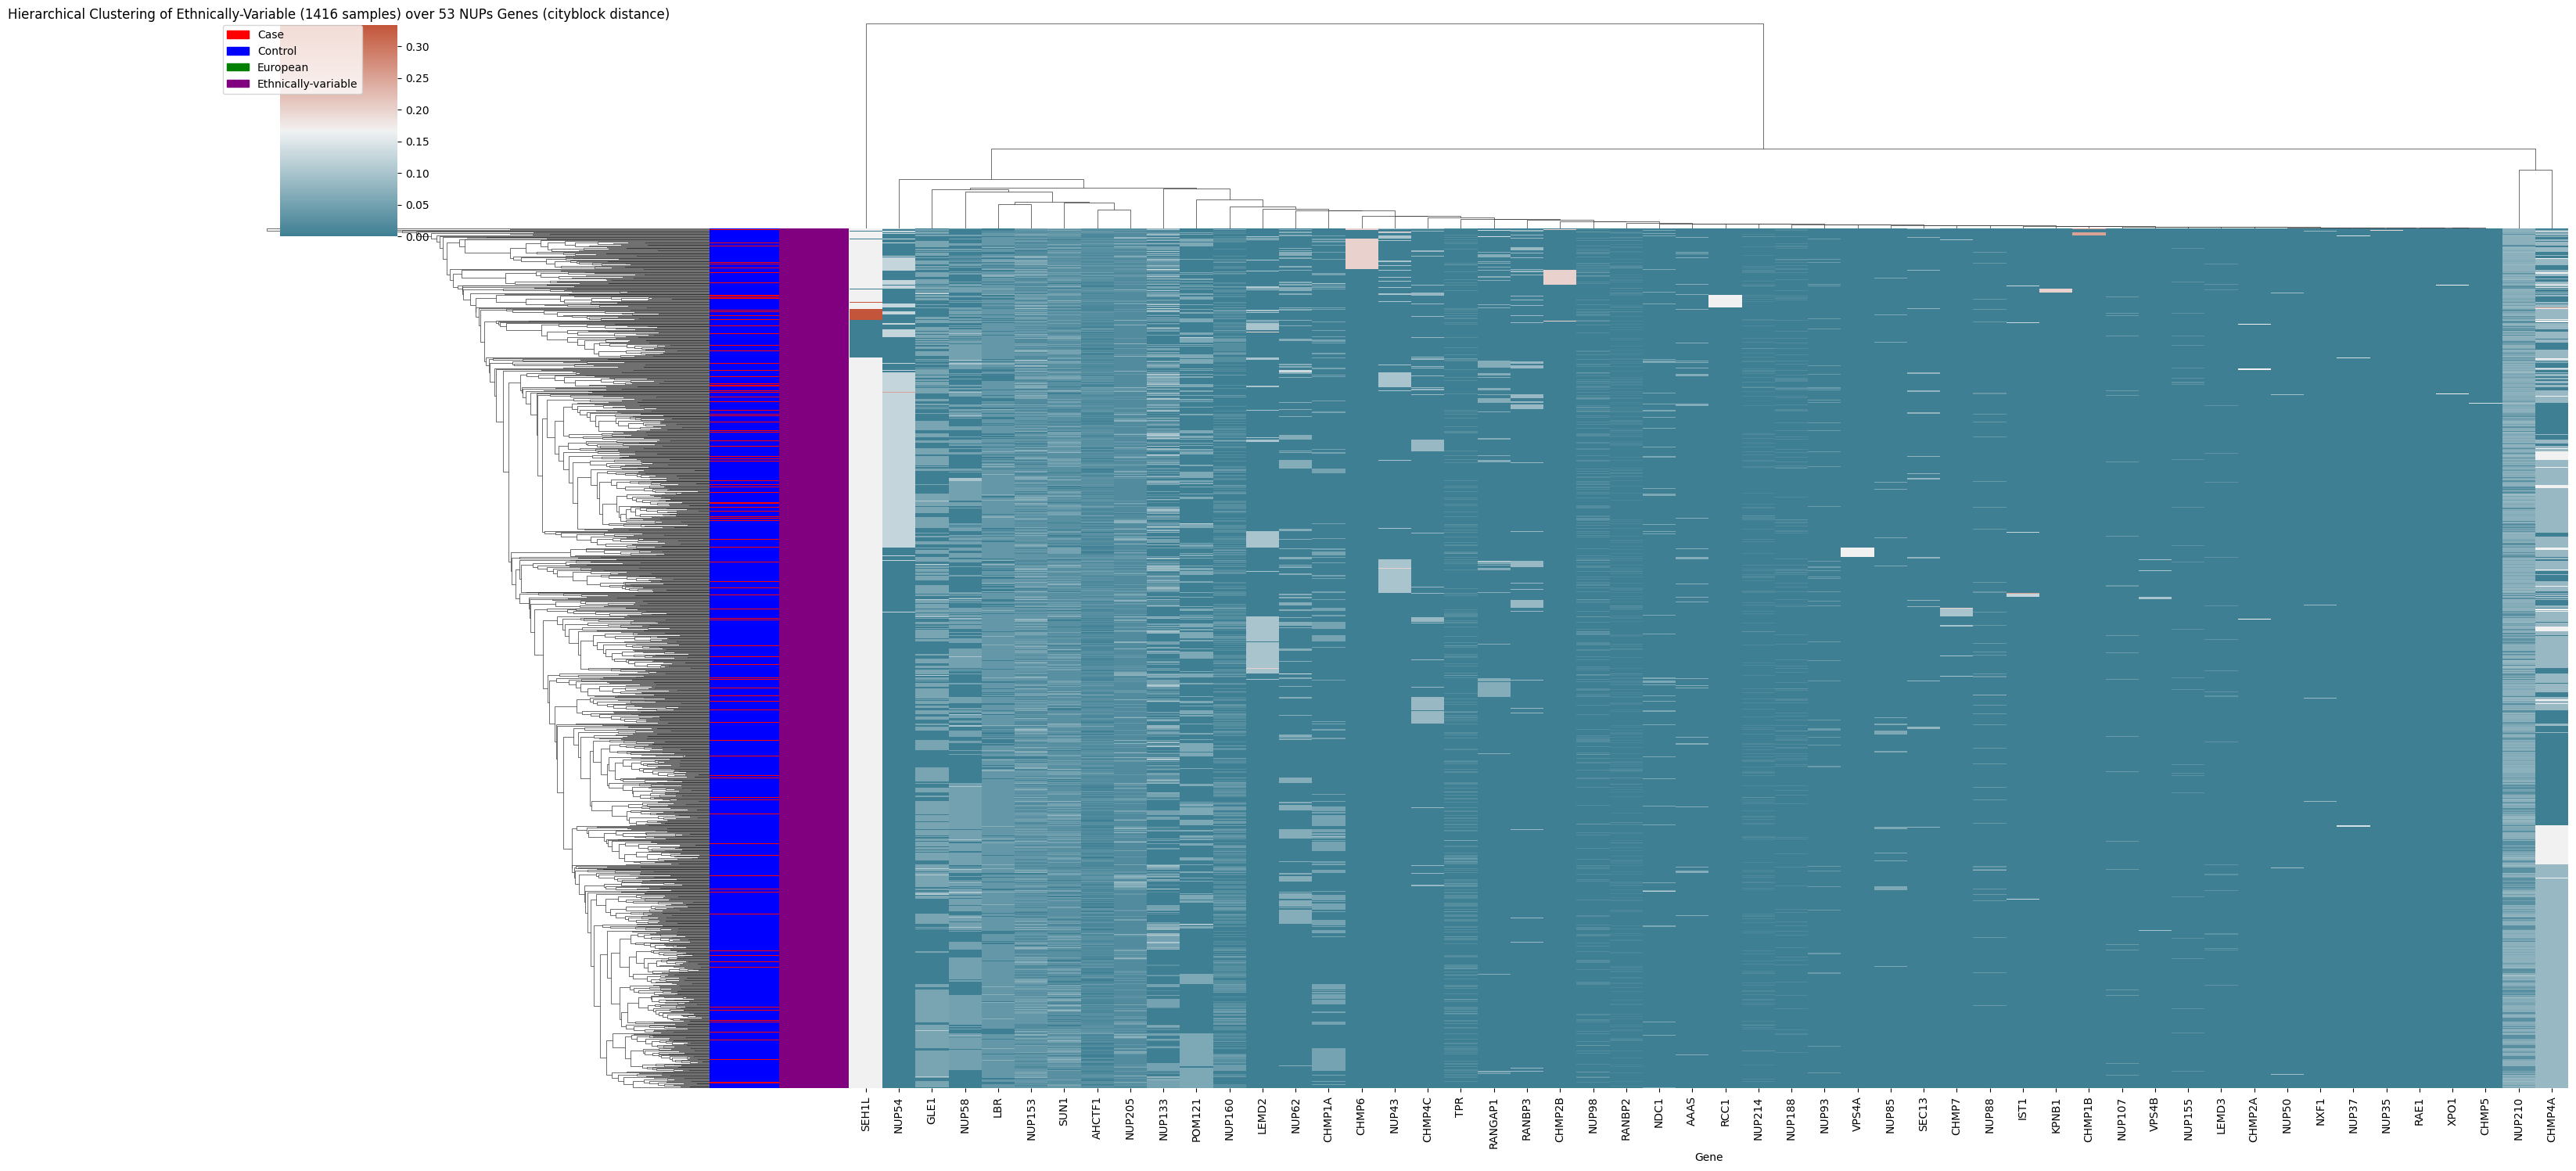

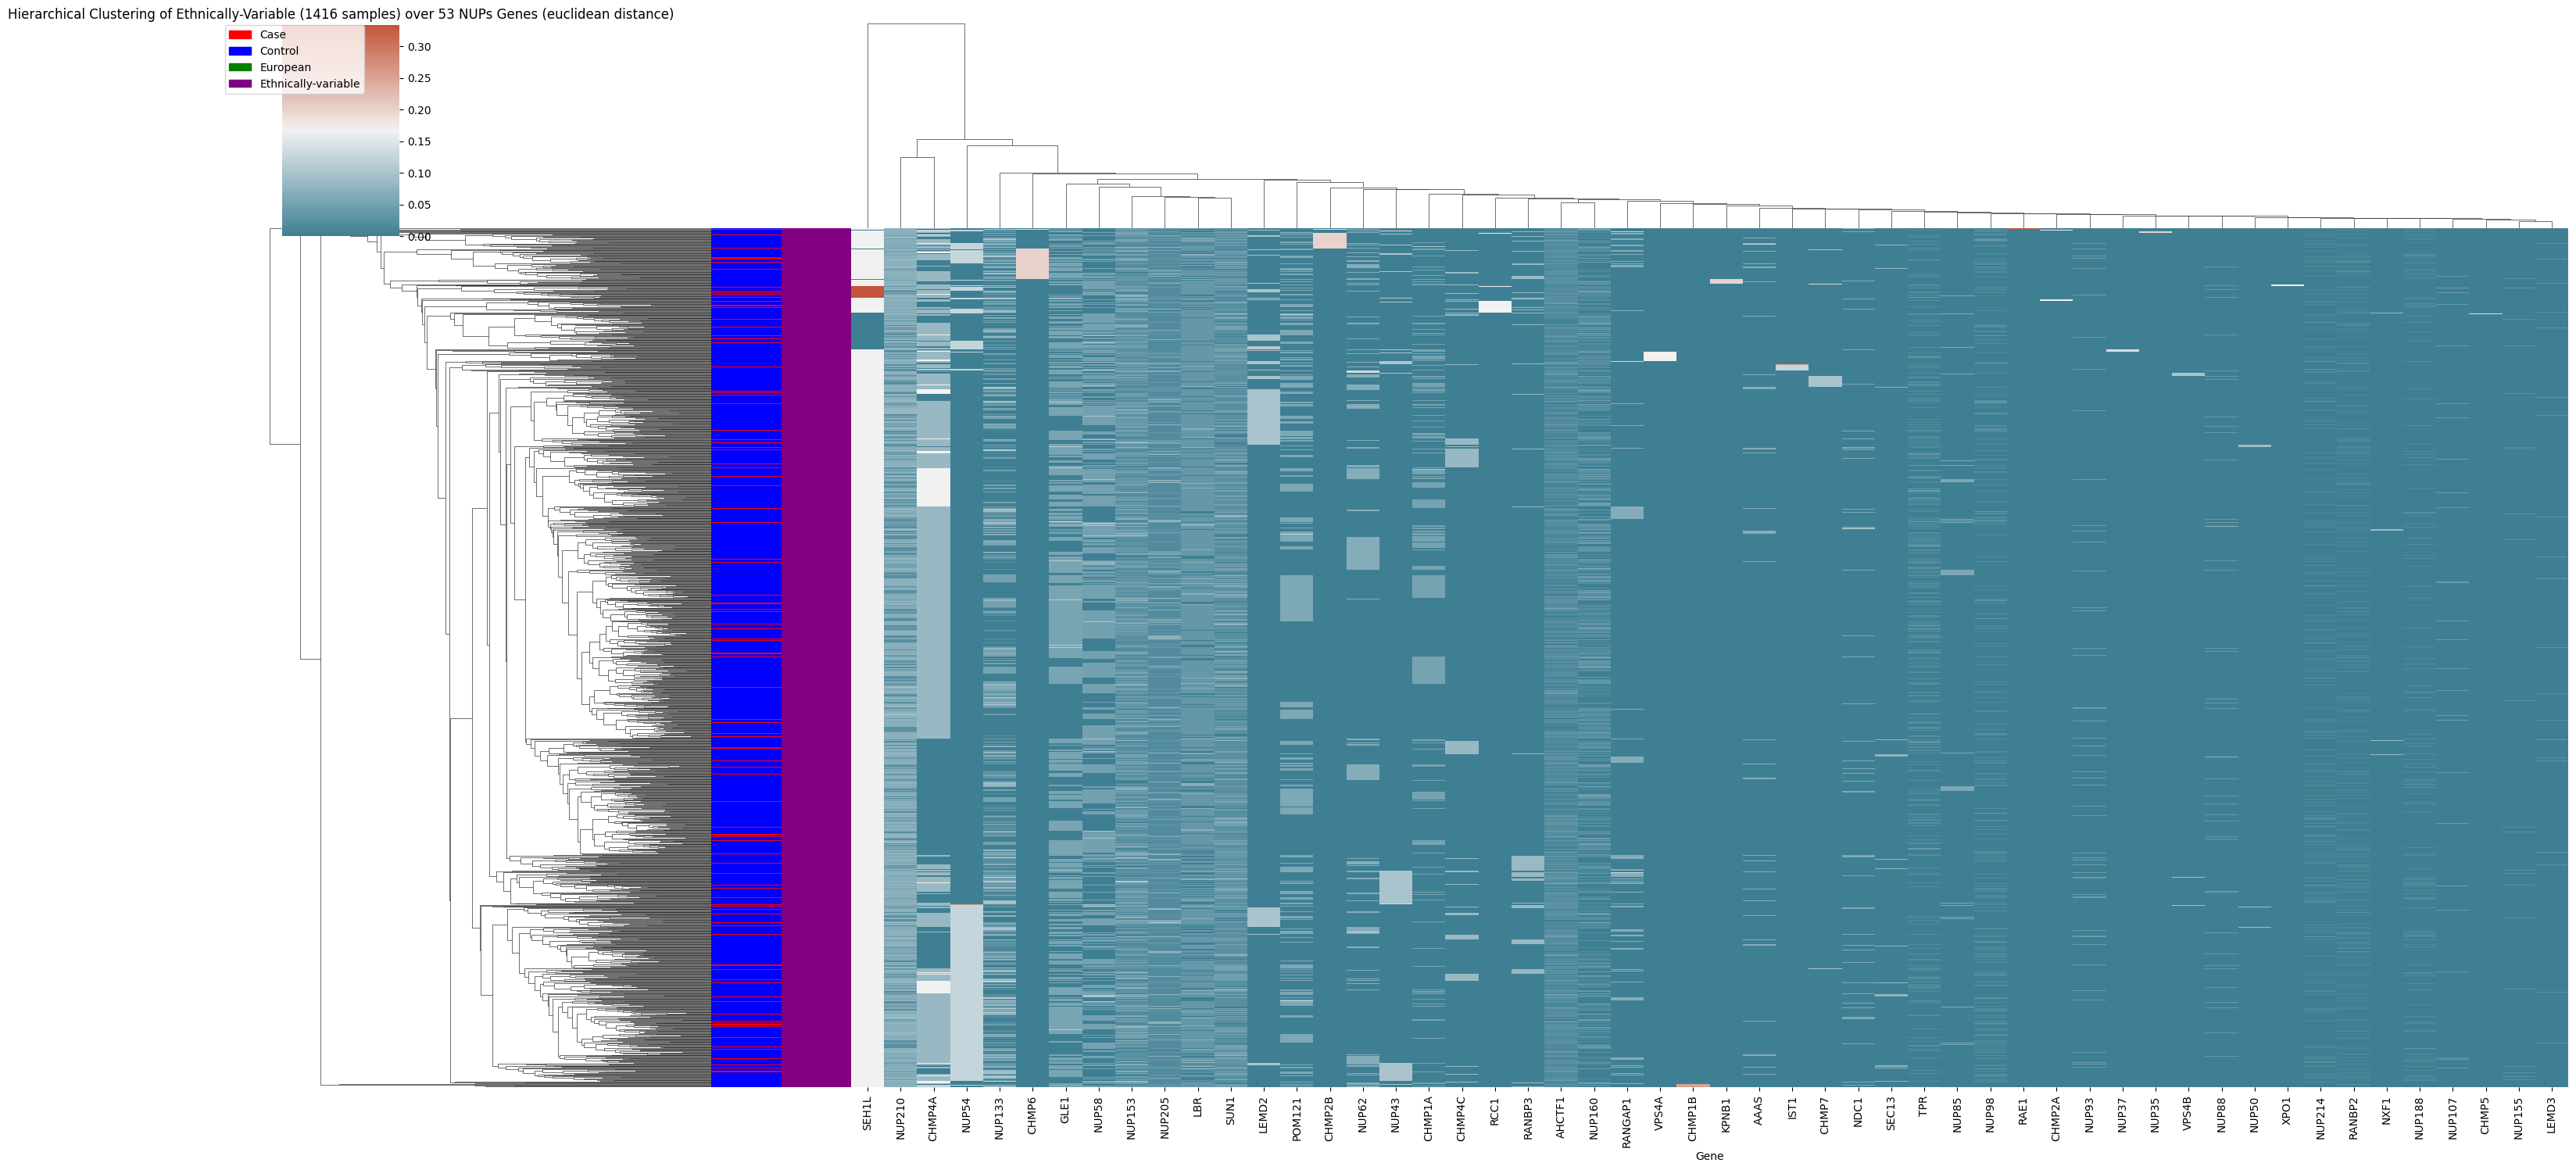


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


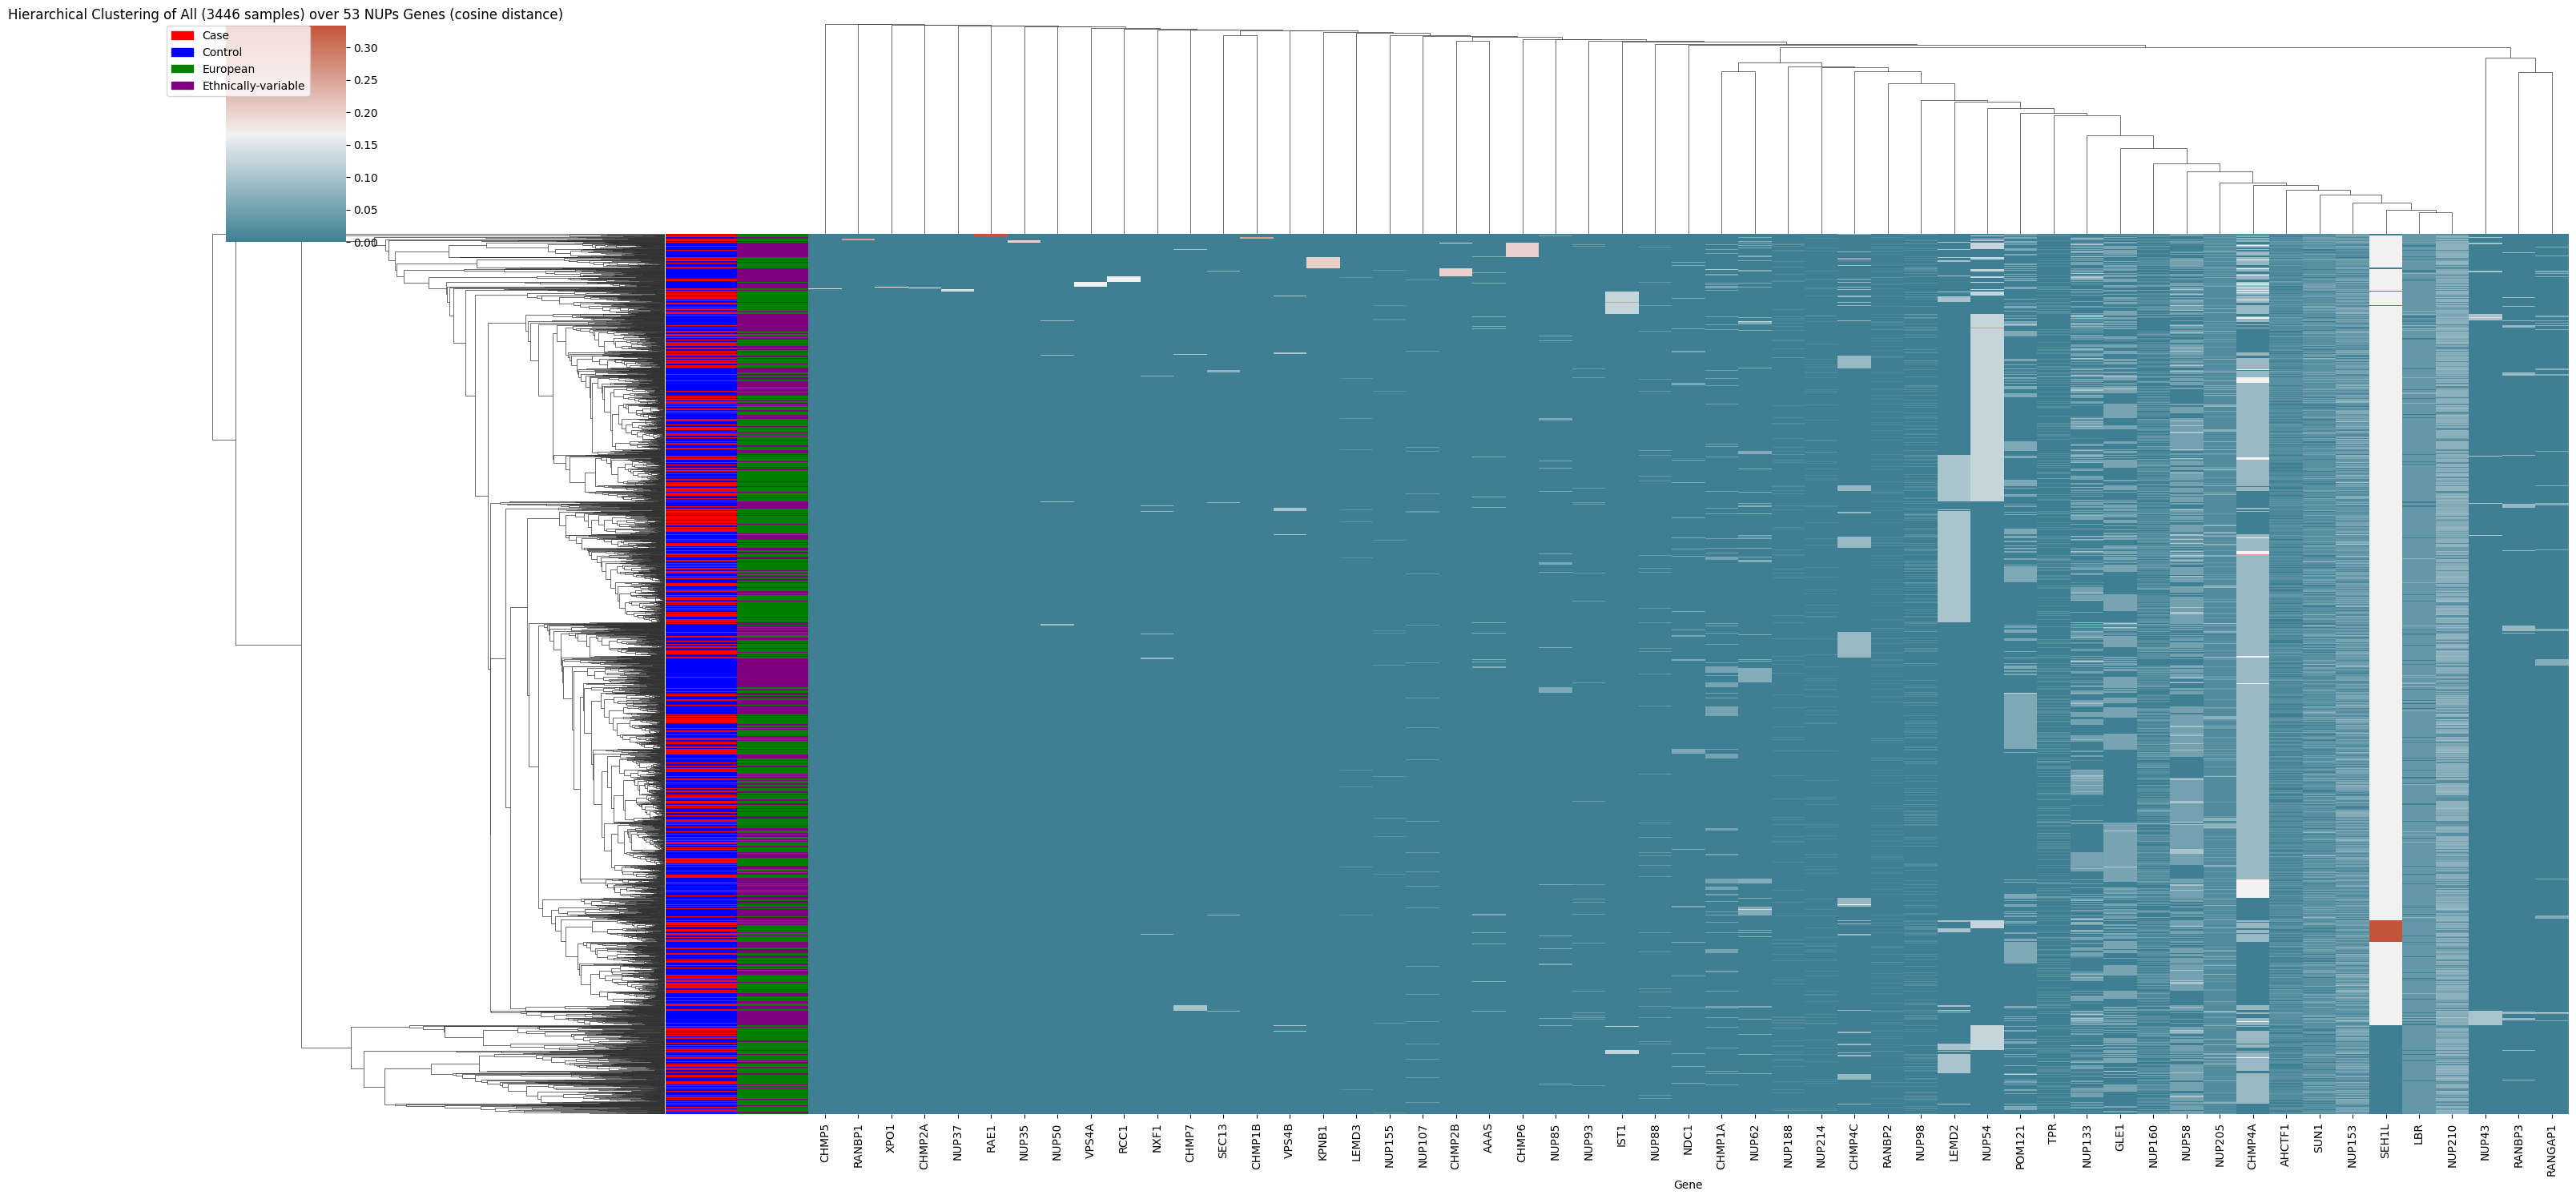

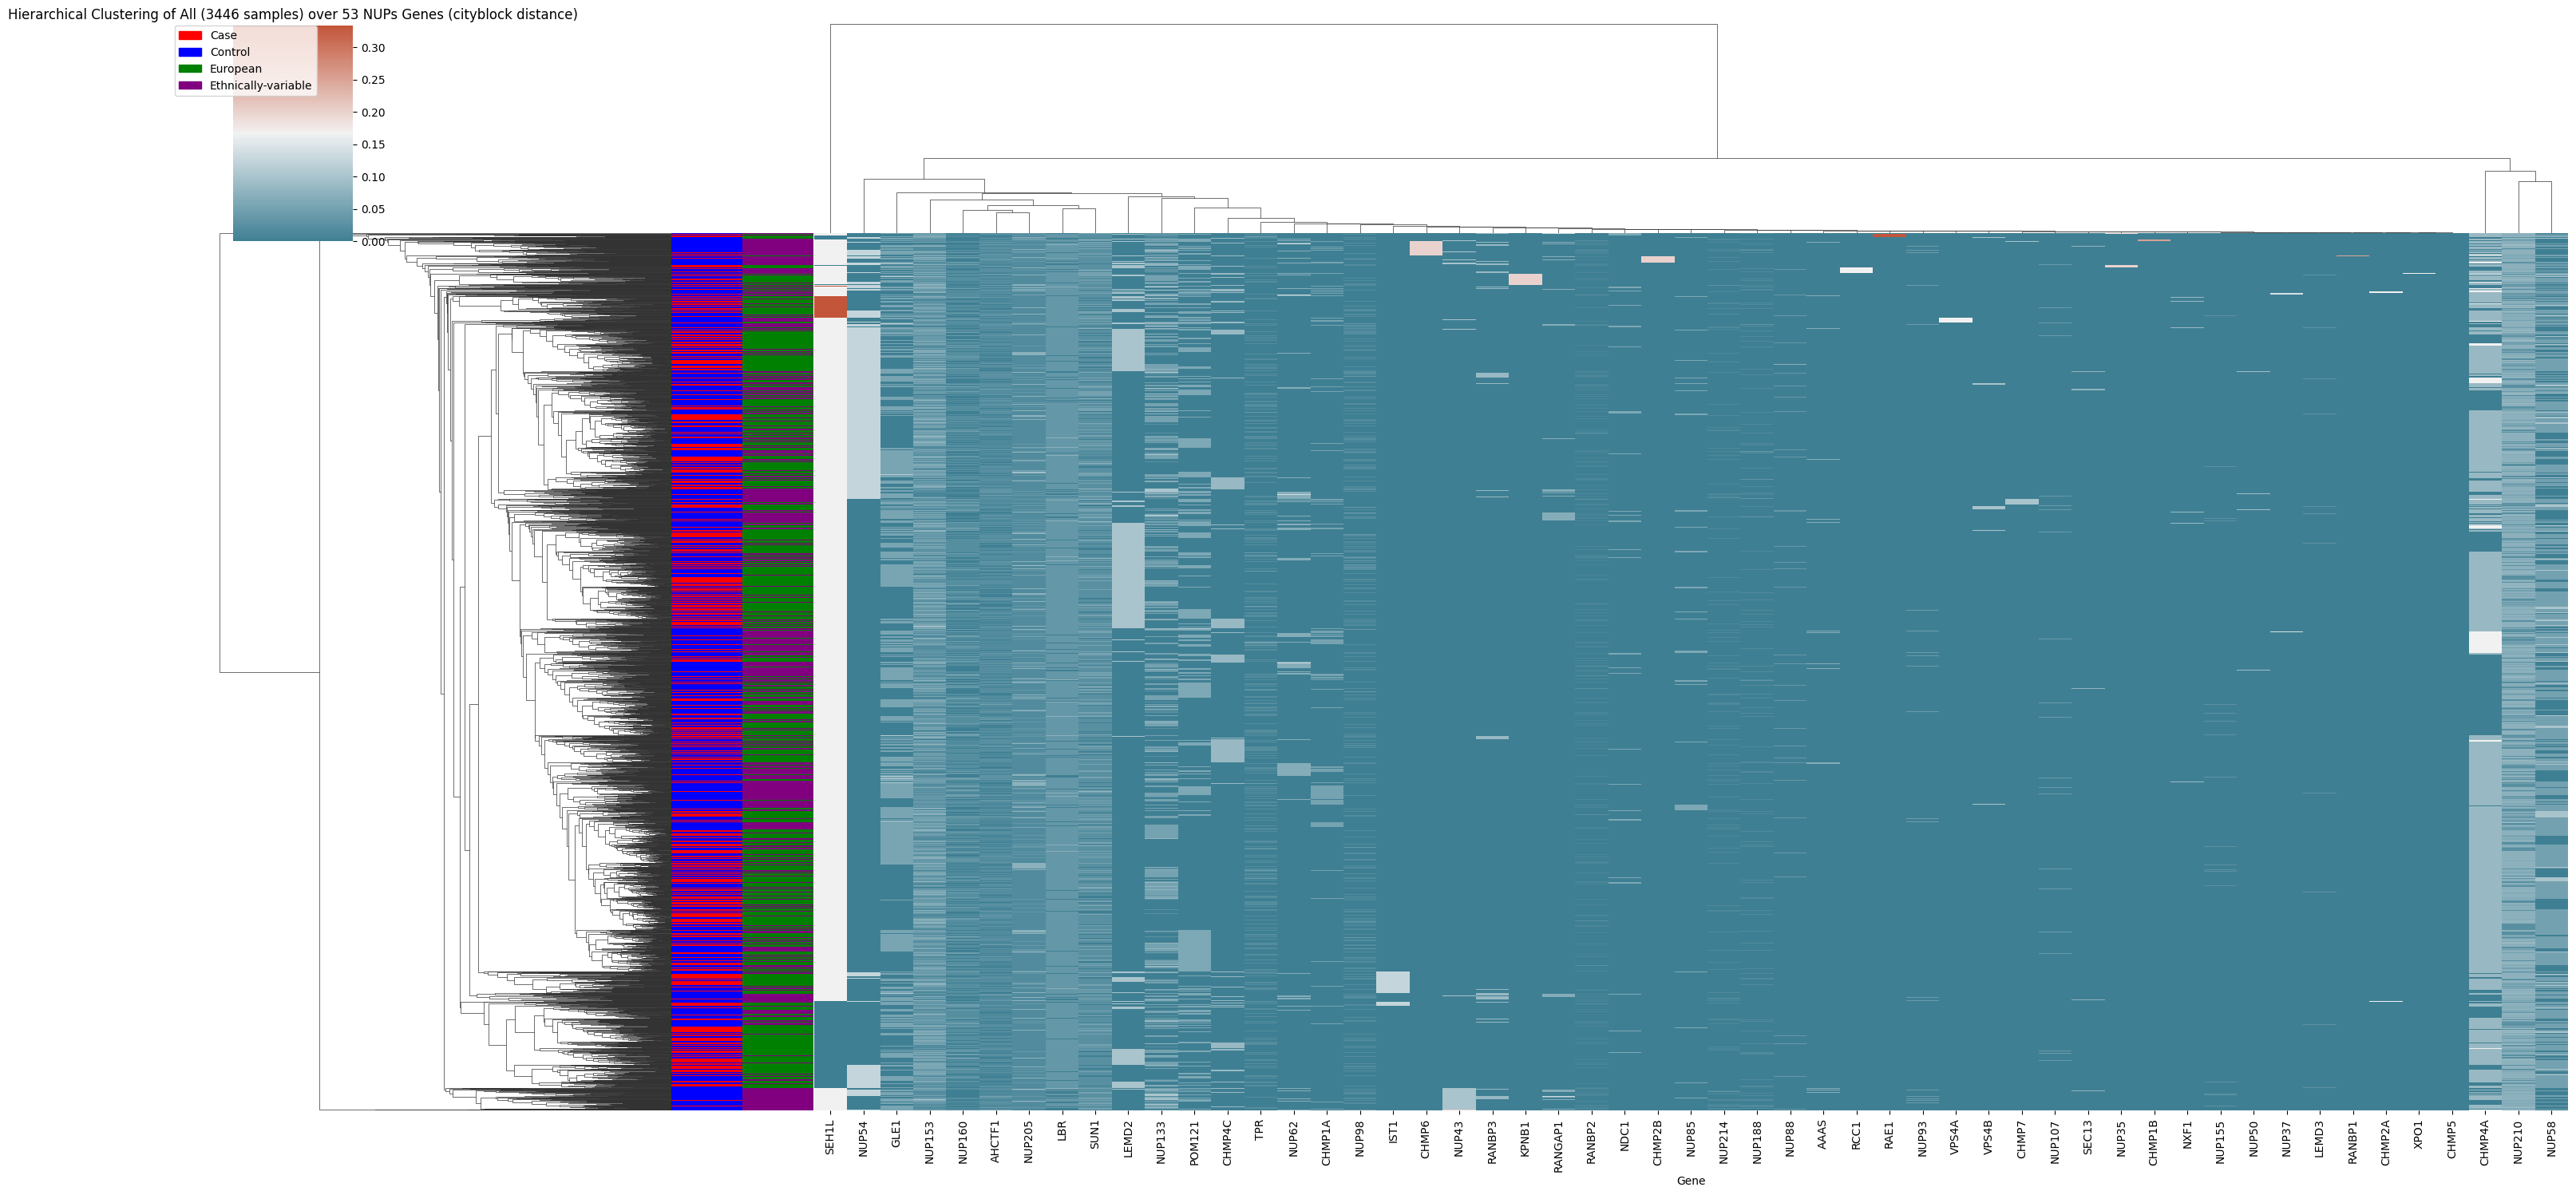

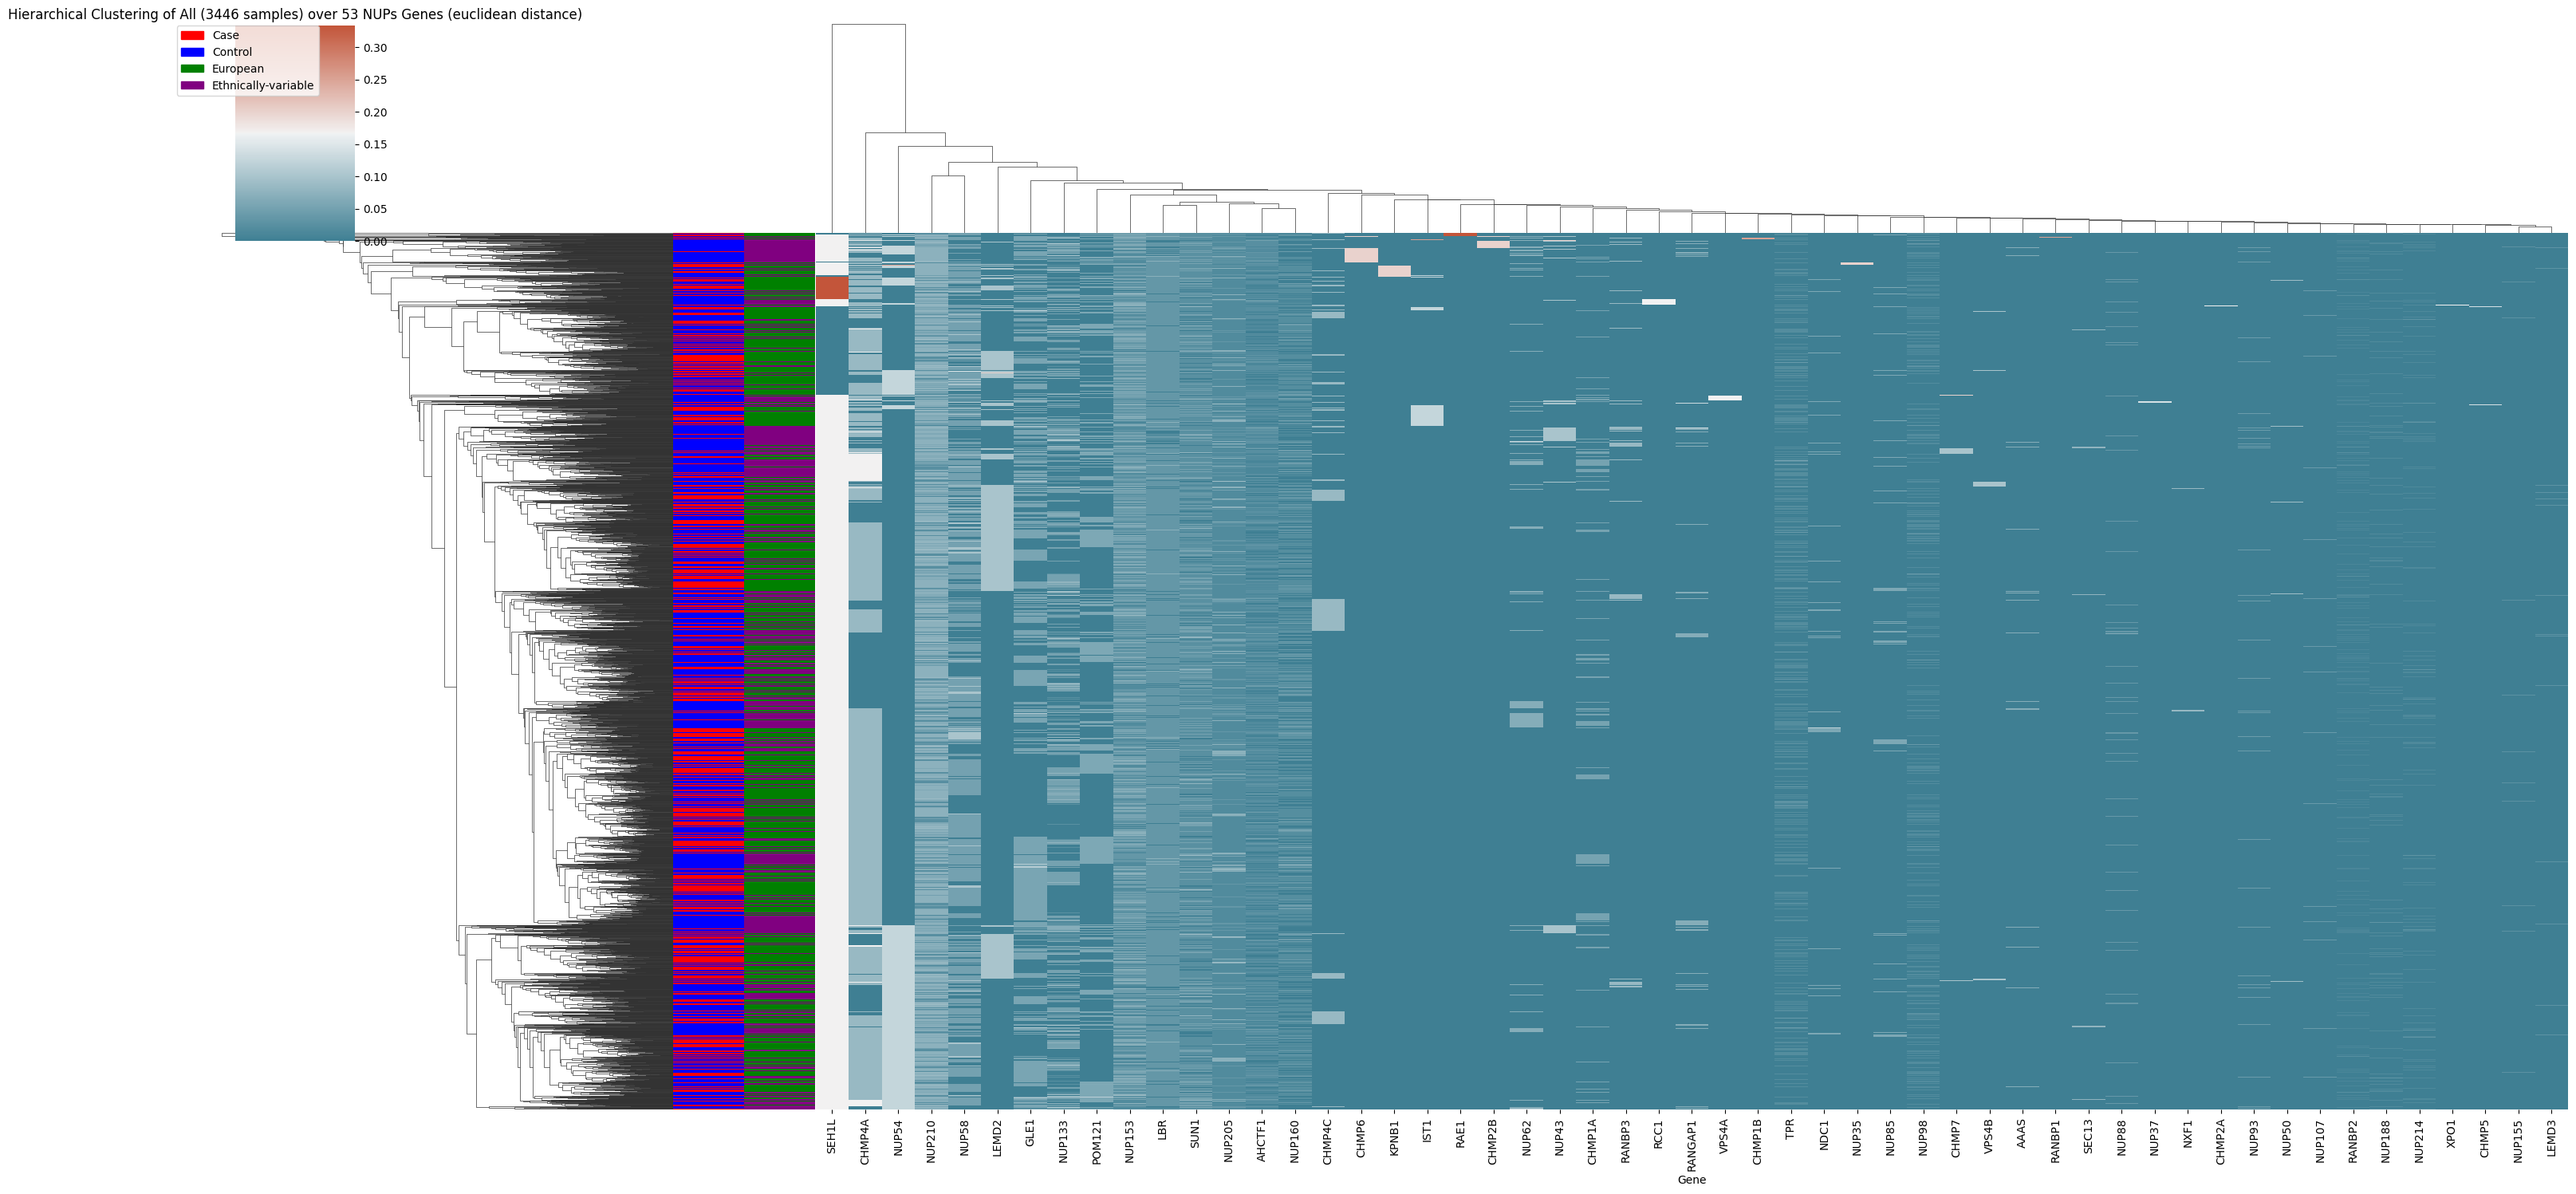

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches


for name, sampleSet in {'European': euro_samples, 'Ethnically-Variable': holdout_samples, 'All': np.hstack([euro_samples, holdout_samples]) }.items():
    filteredSampleResults = sampleResults[sampleResults['id'].isin(sampleSet)]
    # Ensure that the ids in sampleResults are strings
    filteredSampleResults['id'] = filteredSampleResults['id'].astype(str)

    # Filter the genotype dataframe to only include the samples in sampleResults
    genotype_df_filtered = genotypeData[filteredSampleResults['id']]

    # Create a color mapping for your samples
    sample_colors_case_control = genotype_df_filtered. columns.map(lambda x: 'red' if filteredSampleResults[filteredSampleResults['id'] == x]['label'].values[0] == 1 else 'blue')
    # Create a color mapping for your samples for euro/holdout
    sample_colors_euro_holdout = genotype_df_filtered.columns.map(lambda x: 'green' if x in euro_samples else 'purple')

    # Combine the two color mappings
    sample_colors = pd.DataFrame({
        'case_control': sample_colors_case_control,
        'euro_holdout': sample_colors_euro_holdout
    })

    # Generate a custom colormap for the heatmap values
    cmap = sns.diverging_palette(220, 20, as_cmap=True)

    # Create a clustermap
    for metric in ['cosine', 'cityblock', 'euclidean']:
        genotype_df_filtered = genotype_df_filtered.loc[genotype_df_filtered.std(axis=1) > 0]
        try:
            cluster_map = sns.clustermap(genotype_df_filtered.T, 
                                        metric=metric,
                                        cmap=cmap, 
                                        row_colors=[sample_colors_case_control, sample_colors_euro_holdout], 
                                        # col_colors=sample_colors,
                                        figsize=(30, 15),  # Increasing the figure size
                                        xticklabels=True,  # Ensuring all xticklabels are displayed
                                        yticklabels=False)
      

            # Rotate x-axis labels for better visibility
            plt.setp(cluster_map.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
            plt.setp(cluster_map.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

            # Set the title
            plt.title(f"Hierarchical Clustering of {name} ({len(filteredSampleResults['id'])} samples) over {len(genotypeData.index)} {geneSetName} Genes ({metric} distance)")

            # Create legend
            red_patch = mpatches.Patch(color='red', label='Case')
            blue_patch = mpatches.Patch(color='blue', label='Control')
            green_patch = mpatches.Patch(color='green', label='European')
            purple_patch = mpatches.Patch(color='purple', label='Ethnically-variable')

            # Adjust legend location
            plt.legend(handles=[red_patch, blue_patch, green_patch, purple_patch], bbox_to_anchor=(0.7, 1), loc=1, borderaxespad=0.)

            # Show the plot
            plt.show()
        except:
            print(f"Error for {metric} distance")
            continue


In [57]:
sample_colors

,case_control,euro_holdout
0,red,green
1,red,green
2,red,green
3,red,purple
4,red,green
...,...,...
3450,blue,purple
3451,blue,purple
3452,blue,purple
3453,blue,purple
